<!-- # Ross Sea synthetic gravity inversion -->

<!-- import packages -->

In [1]:
from __future__ import annotations

%load_ext autoreload
%autoreload 2

import copy
import itertools
import logging
import os
import pathlib
import pickle
import shutil

import numpy as np
import pandas as pd
import verde as vd
import xarray as xr
from polartoolkit import maps
from polartoolkit import utils as polar_utils
from tqdm.autonotebook import tqdm

import RIS_gravity_inversion.plotting as RIS_plotting
import RIS_gravity_inversion.synthetic as RIS_synth

os.environ["POLARTOOLKIT_HEMISPHERE"] = "south"

logging.getLogger().setLevel(logging.INFO)

from invert4geom import inversion, plotting, regional, utils

<!-- # Get synthetic model data -->

INFO:root:using preprocessed 5km grid since spacing is > 5km
INFO:root:returning grid with new region and/or registration, same spacing
INFO:root:returning grid with new region and/or registration, same spacing


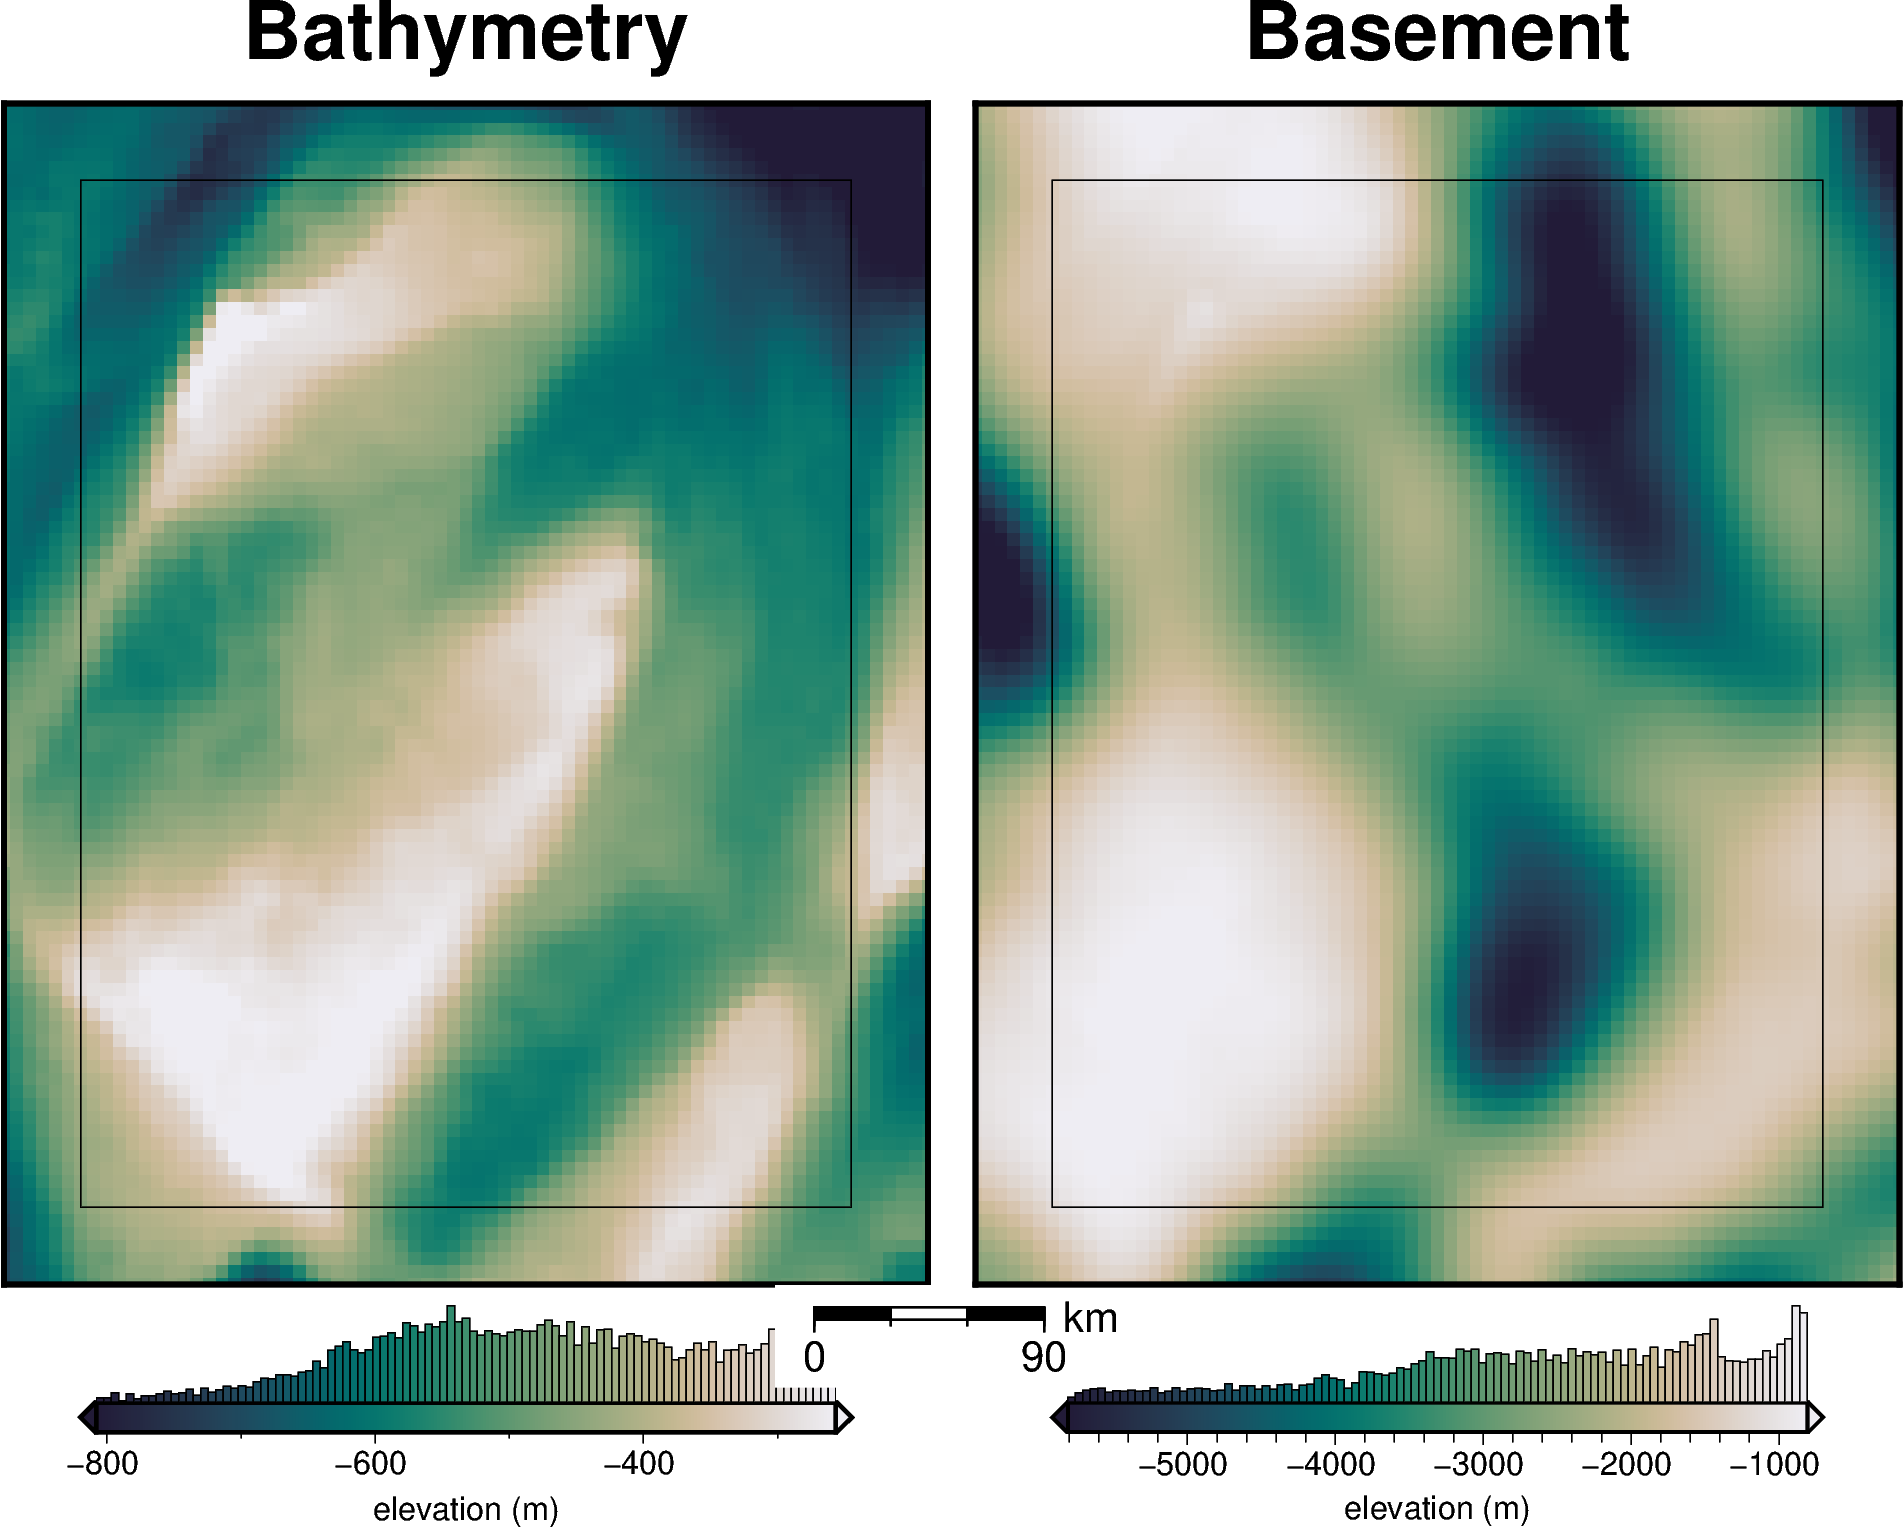

  0%|          | 0/4941 [00:00<?, ?it/s]

  0%|          | 0/4941 [00:00<?, ?it/s]

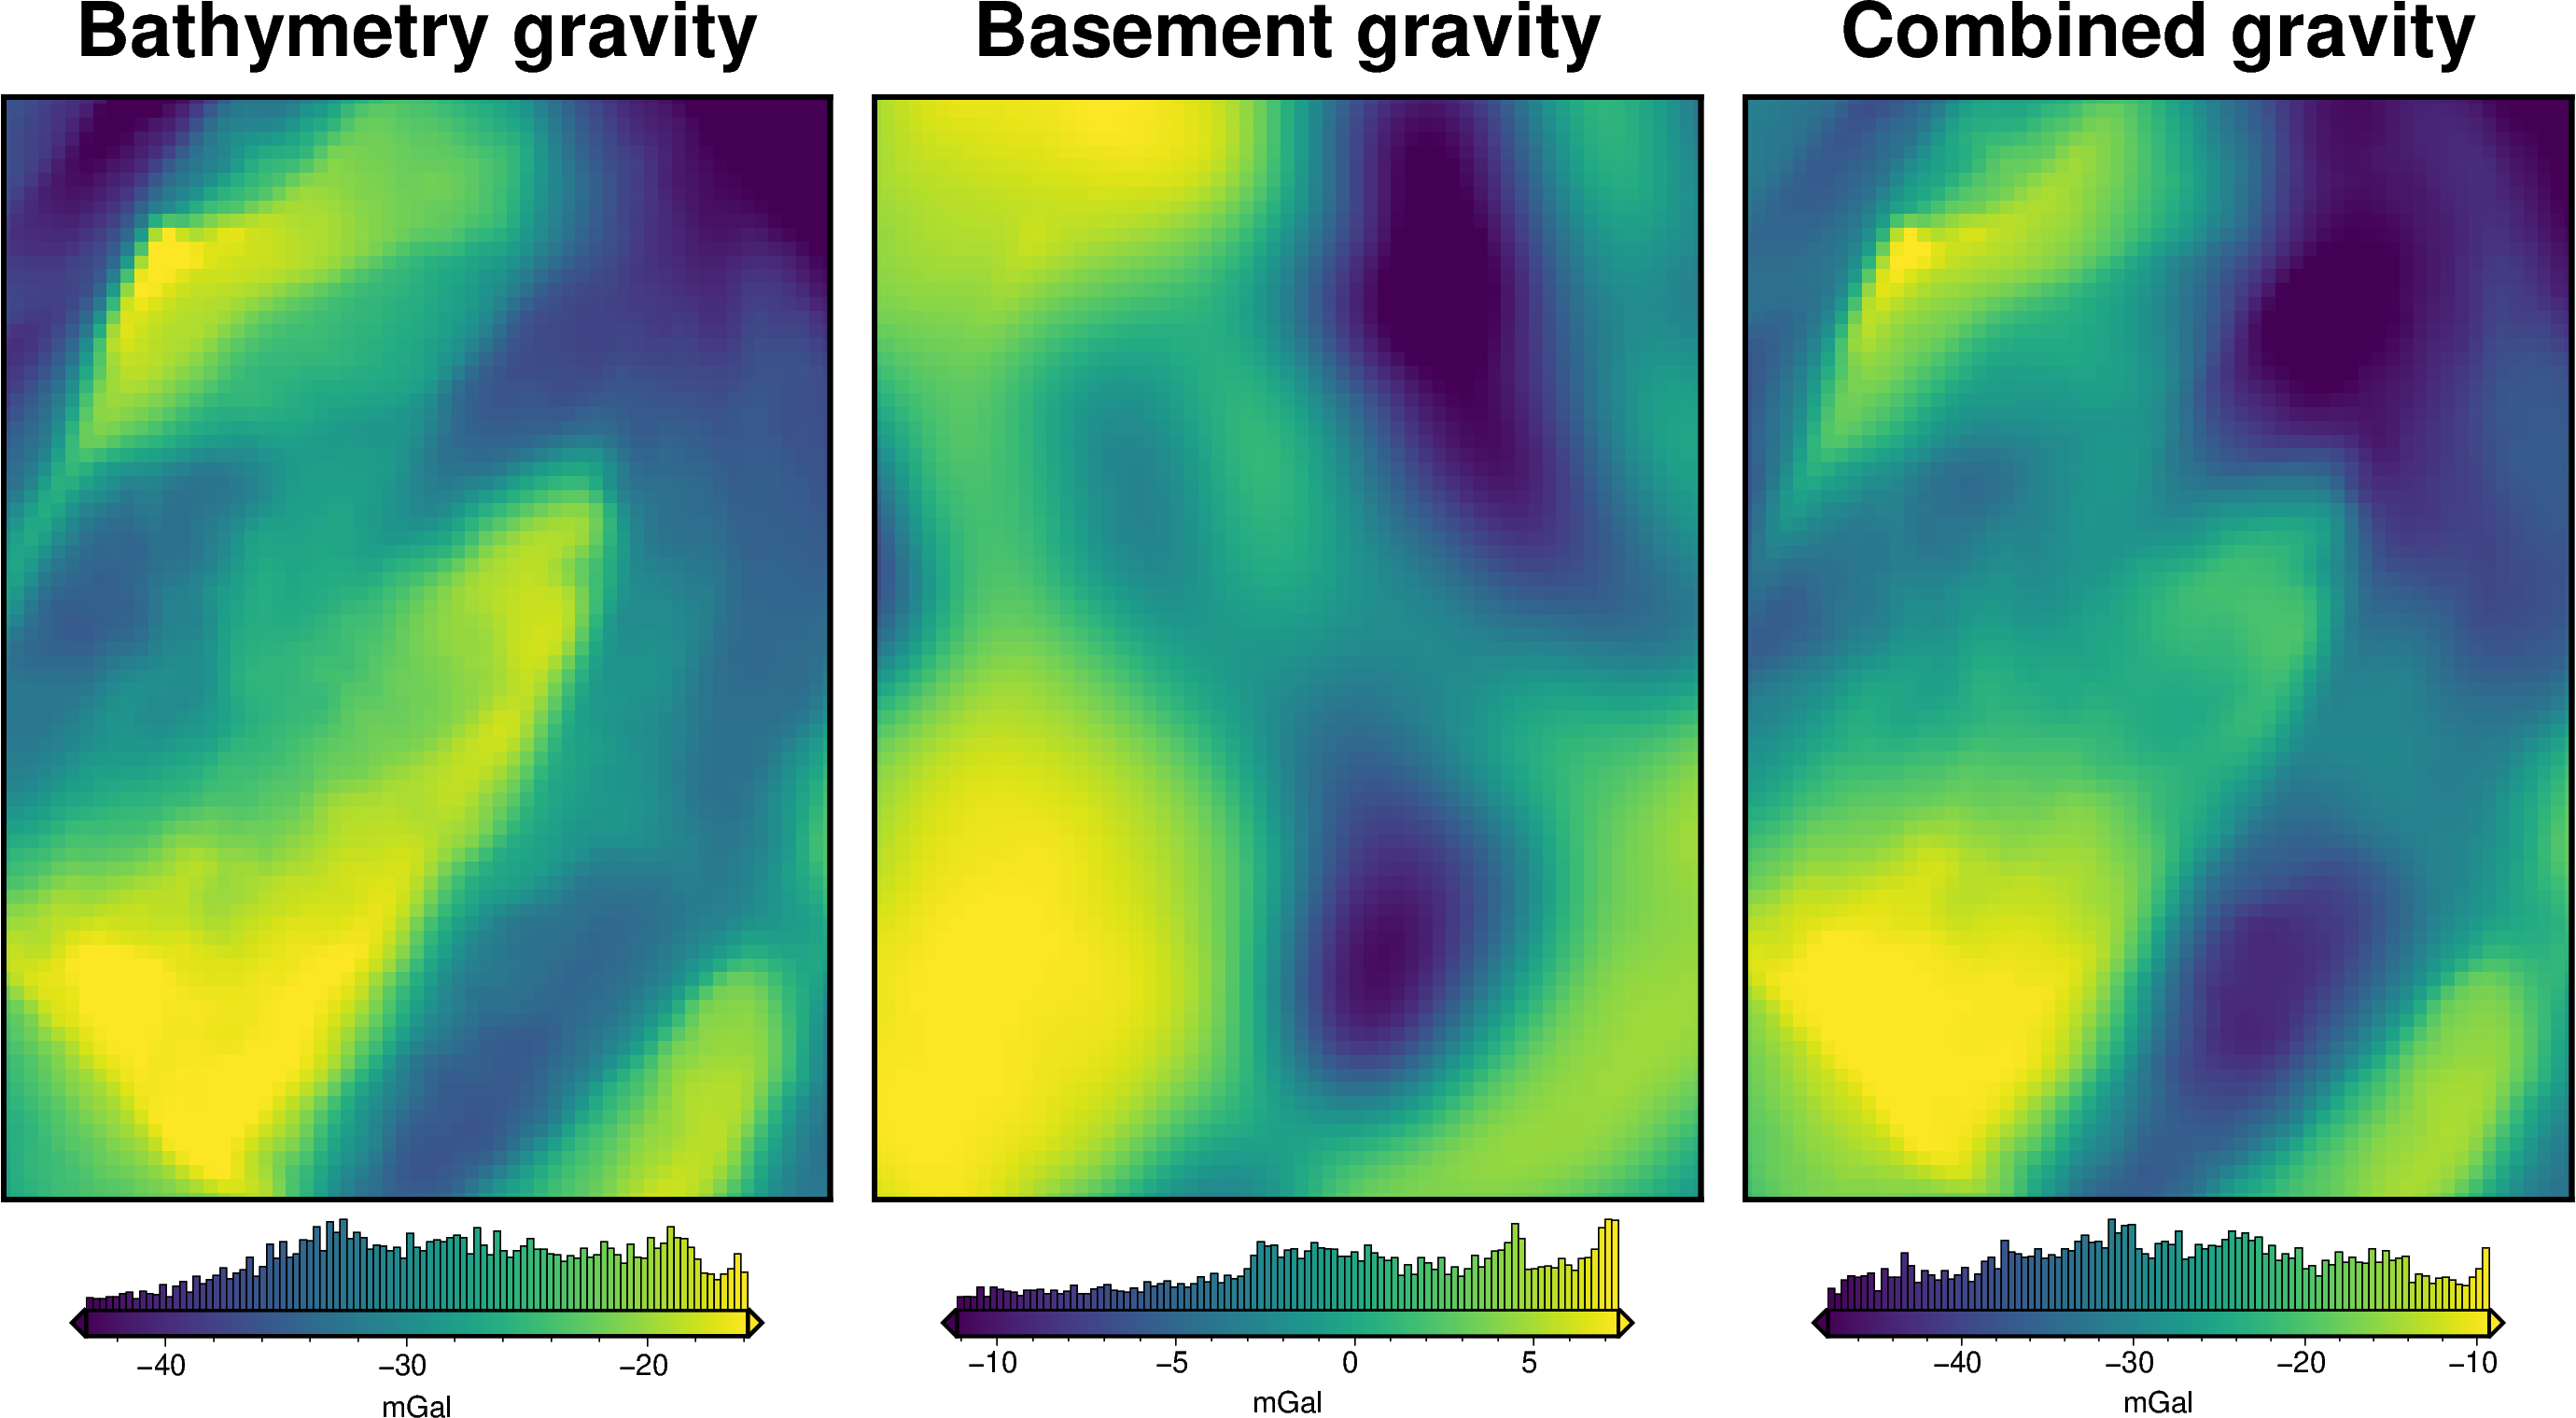

120000.0

In [2]:
# set grid parameters
spacing = 5e3
inversion_region = (-40e3, 260e3, -1800e3, -1400e3)

true_density_contrast = 1476

bathymetry, basement, original_grav_df = RIS_synth.load_synthetic_model(
    spacing=spacing,
    buffer=spacing * 6,
    basement=True,
    zref=0,
    bathymetry_density_contrast=true_density_contrast,
)
buffer_region = polar_utils.get_grid_info(bathymetry)[1]

inside_bathymetry = bathymetry.sel(
    easting=slice(inversion_region[0], inversion_region[1]),
    northing=slice(inversion_region[2], inversion_region[3]),
)
inversion_area = (
    (inversion_region[1] - inversion_region[0])
    / 1e3
    * (inversion_region[3] - inversion_region[2])
    / 1e3
)
inversion_area

In [3]:
# normalize regional gravity between 0 and 1
original_grav_df["basement_grav_normalized"] = (
    vd.grid_to_table(
        utils.normalize_xarray(
            original_grav_df.set_index(["northing", "easting"])
            .to_xarray()
            .basement_grav,
            low=-1,
            high=1,
        )
    )
    .reset_index()
    .basement_grav
)
original_grav_df = original_grav_df.drop(
    columns=["basement_grav", "disturbance", "gravity_anomaly"]
)
original_grav_df

northing   easting  upward  bathymetry_grav  basement_grav_normalized
0    -1800000.0  -40000.0  1000.0       -28.046289                  0.830177
1    -1800000.0  -35000.0  1000.0       -26.714502                  0.867672
2    -1800000.0  -30000.0  1000.0       -25.919276                  0.898289
3    -1800000.0  -25000.0  1000.0       -25.236960                  0.921973
4    -1800000.0  -20000.0  1000.0       -24.610928                  0.937189
...         ...       ...     ...              ...                       ...
4936 -1400000.0  240000.0  1000.0       -48.323584                  0.243973
4937 -1400000.0  245000.0  1000.0       -48.356131                  0.167427
4938 -1400000.0  250000.0  1000.0       -49.079005                  0.076264
4939 -1400000.0  255000.0  1000.0       -49.877171                 -0.022265
4940 -1400000.0  260000.0  1000.0       -50.834525                 -0.125205

[4941 rows x 5 columns]

<!-- # Set filename -->

In [112]:
ensemble_path = (
    "../../results/08_constraint_spacing_vs_regional_strength_ensemble_linear"
)
ensemble_fname = f"{ensemble_path}.csv"

In [113]:
num = 8  # CHANGE TO 8

# Define total number of constraints
constraint_numbers = np.linspace(4, 70, num)
constraint_numbers = [int(i) for i in constraint_numbers]

# Define number of constraints in each direction
# constraint_numbers = np.arange(2, 10)
assert len(constraint_numbers) == num

# Define regional strength
regional_strengths = [float(round(x, 2)) for x in np.linspace(0, 50, num)]

print("number of constraints:", constraint_numbers)
print("regional strengths:", regional_strengths)

number of constraints: [4, 13, 22, 32, 41, 51, 60, 70]
regional strengths: [0.0, 7.14, 14.29, 21.43, 28.57, 35.71, 42.86, 50.0]


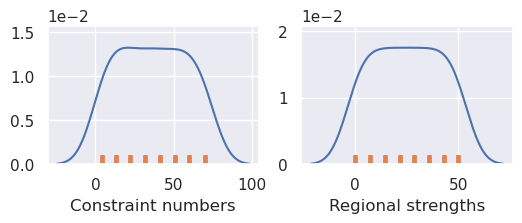

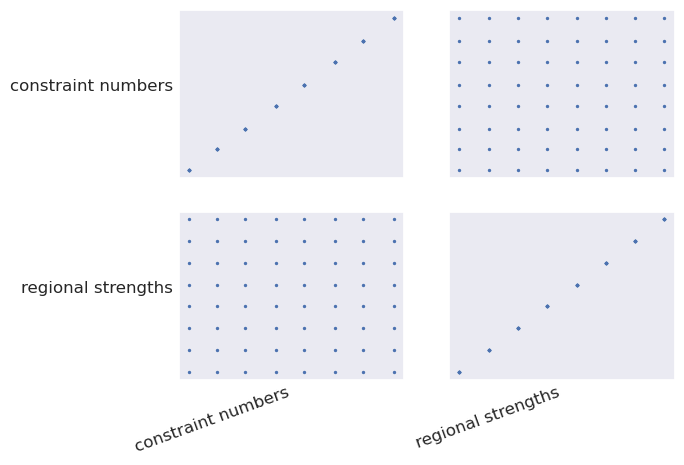

In [114]:
# turn into dataframe
sampled_params_df = pd.DataFrame(
    itertools.product(
        constraint_numbers,
        regional_strengths,
    ),
    columns=[
        "constraint_numbers",
        "regional_strengths",
    ],
)

sampled_params_dict = dict(
    constraint_numbers=dict(sampled_values=sampled_params_df.constraint_numbers),
    regional_strengths=dict(sampled_values=sampled_params_df.regional_strengths),
)

plotting.plot_latin_hypercube(
    sampled_params_dict,
)

array([ 4, 13, 22, 32, 41, 51, 60, 70])

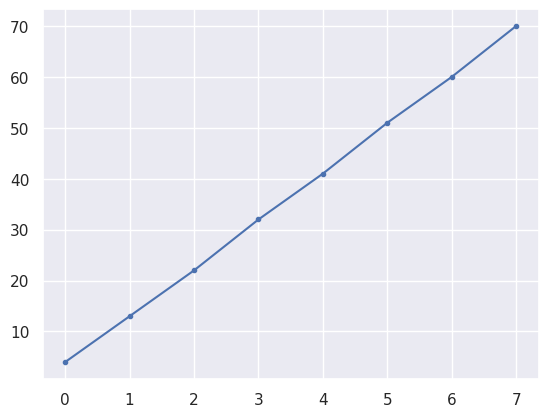

In [115]:
vals = sampled_params_df.constraint_numbers.unique()
pd.Series(vals).plot(marker=".")
vals

# Create starting models and constraints
Only need to do this for unique combinations of constraint_numbers and constraint_noise_levels

  0%|          | 0/64 [00:00<?, ?it/s]

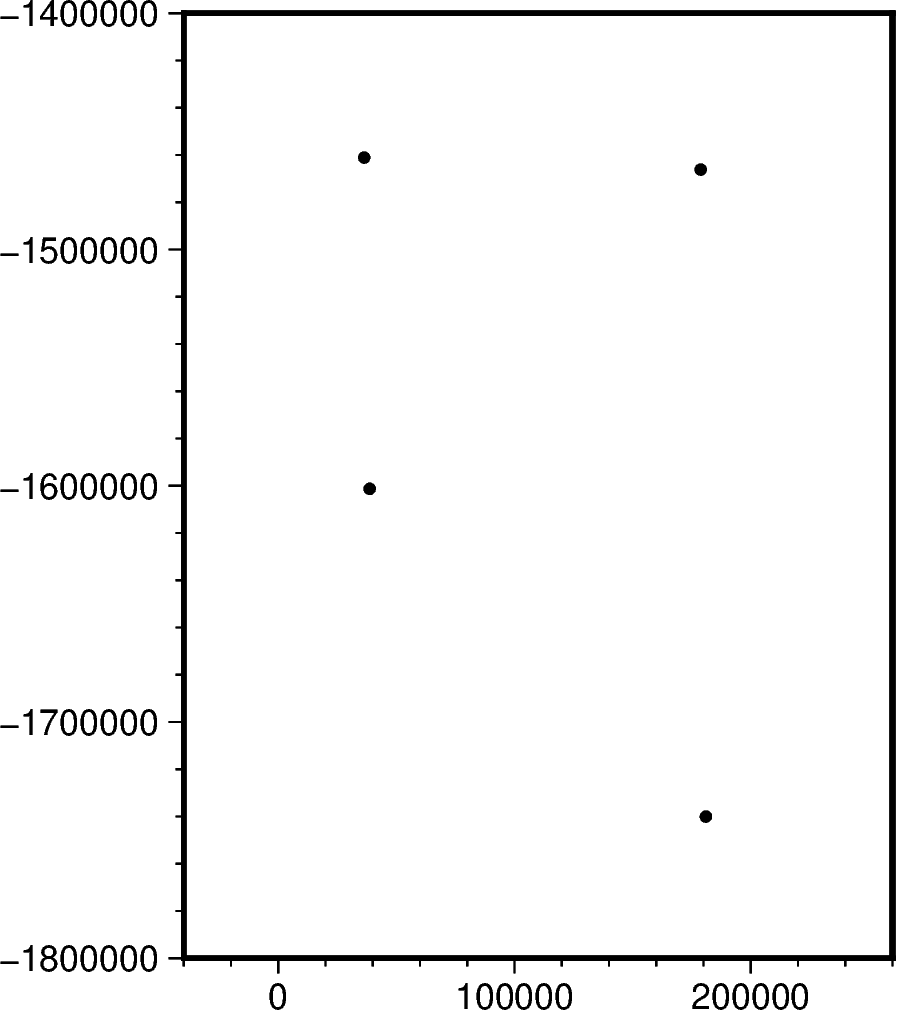

ERROR:invert4geom:Cannot have number of splits n_splits=5 greater than the number of samples: n_samples=4.


skipping and using already create data
skipping and using already create data
skipping and using already create data
skipping and using already create data
skipping and using already create data
skipping and using already create data
skipping and using already create data


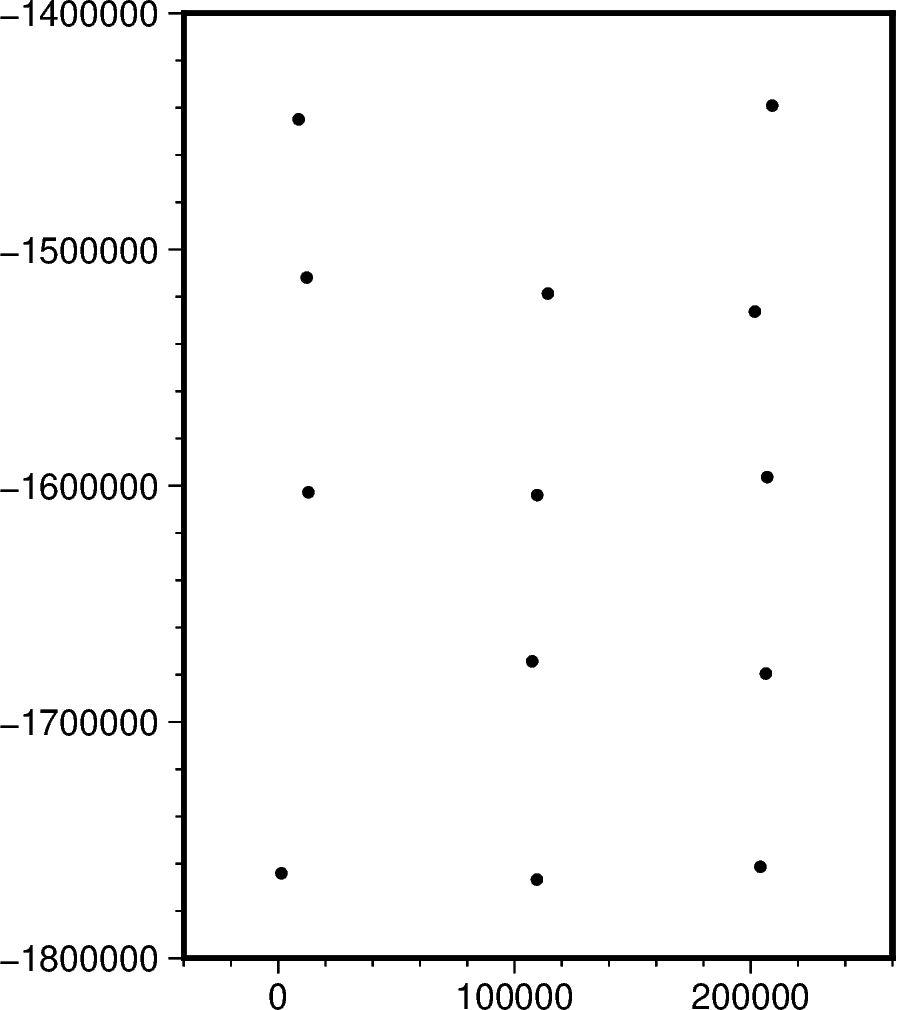

skipping and using already create data
skipping and using already create data
skipping and using already create data
skipping and using already create data
skipping and using already create data
skipping and using already create data
skipping and using already create data


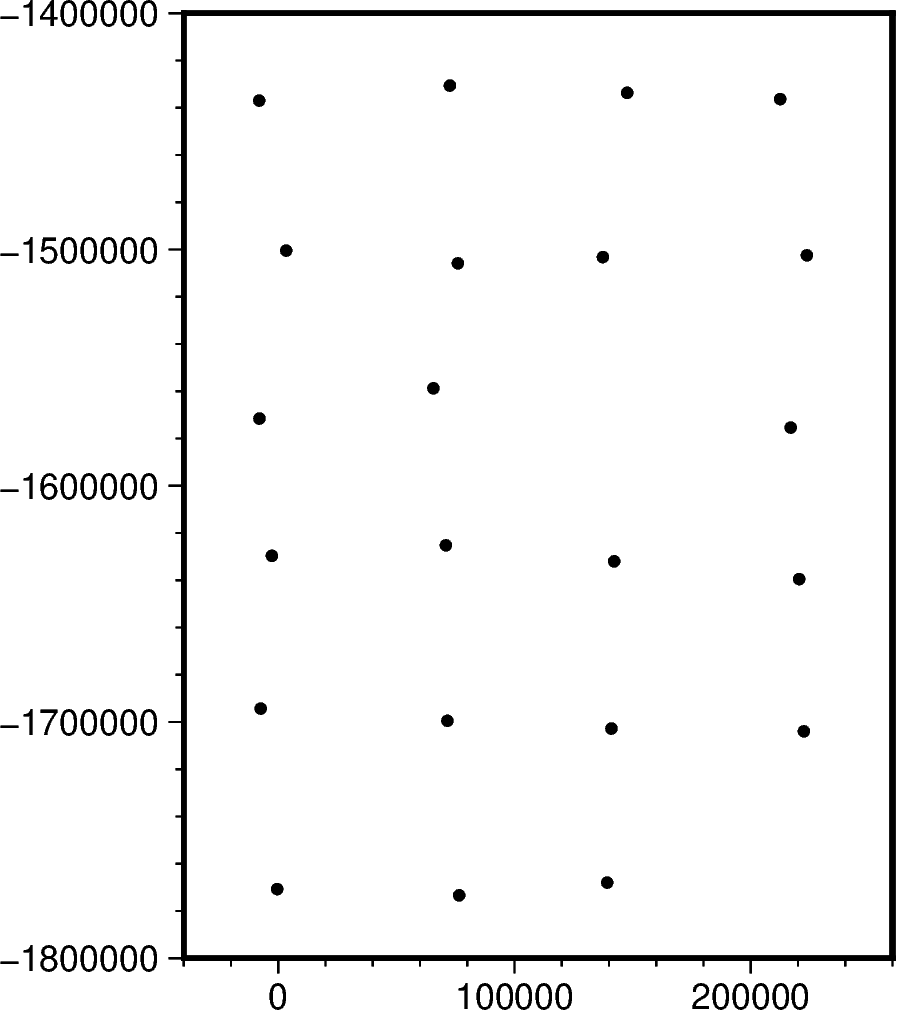

skipping and using already create data
skipping and using already create data
skipping and using already create data
skipping and using already create data
skipping and using already create data
skipping and using already create data
skipping and using already create data


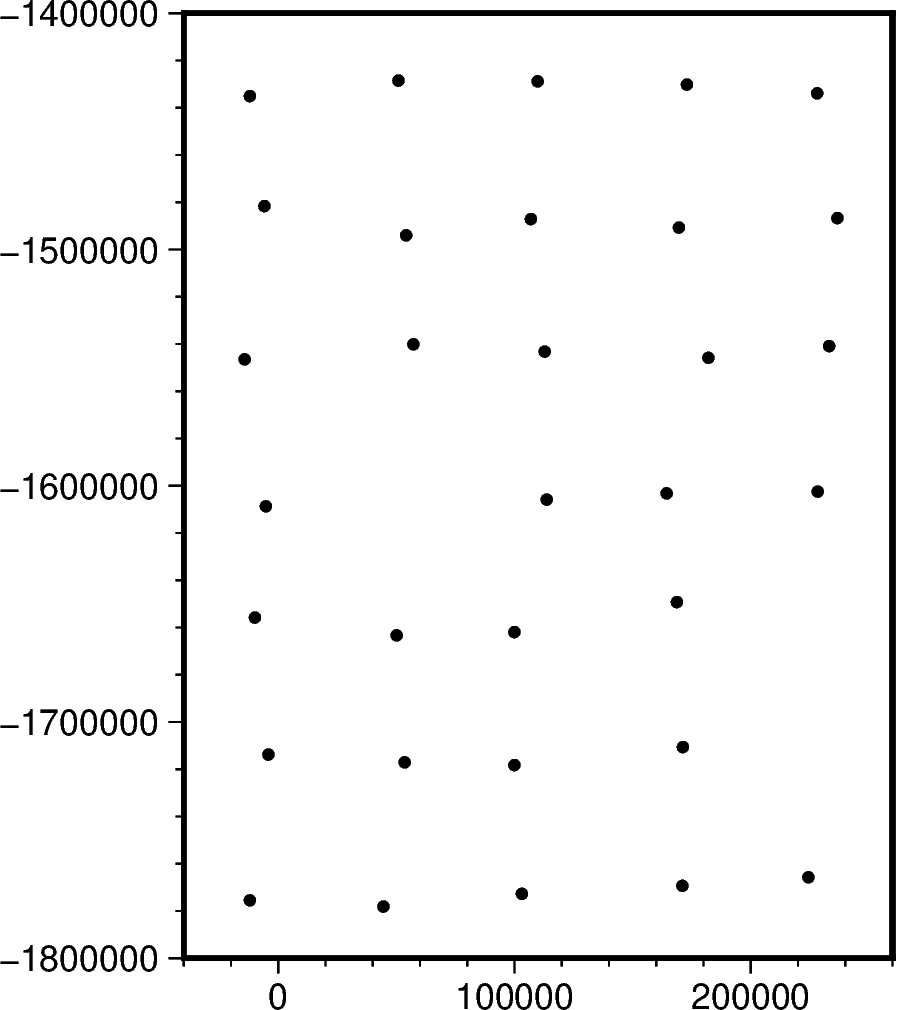

skipping and using already create data
skipping and using already create data
skipping and using already create data
skipping and using already create data
skipping and using already create data
skipping and using already create data
skipping and using already create data


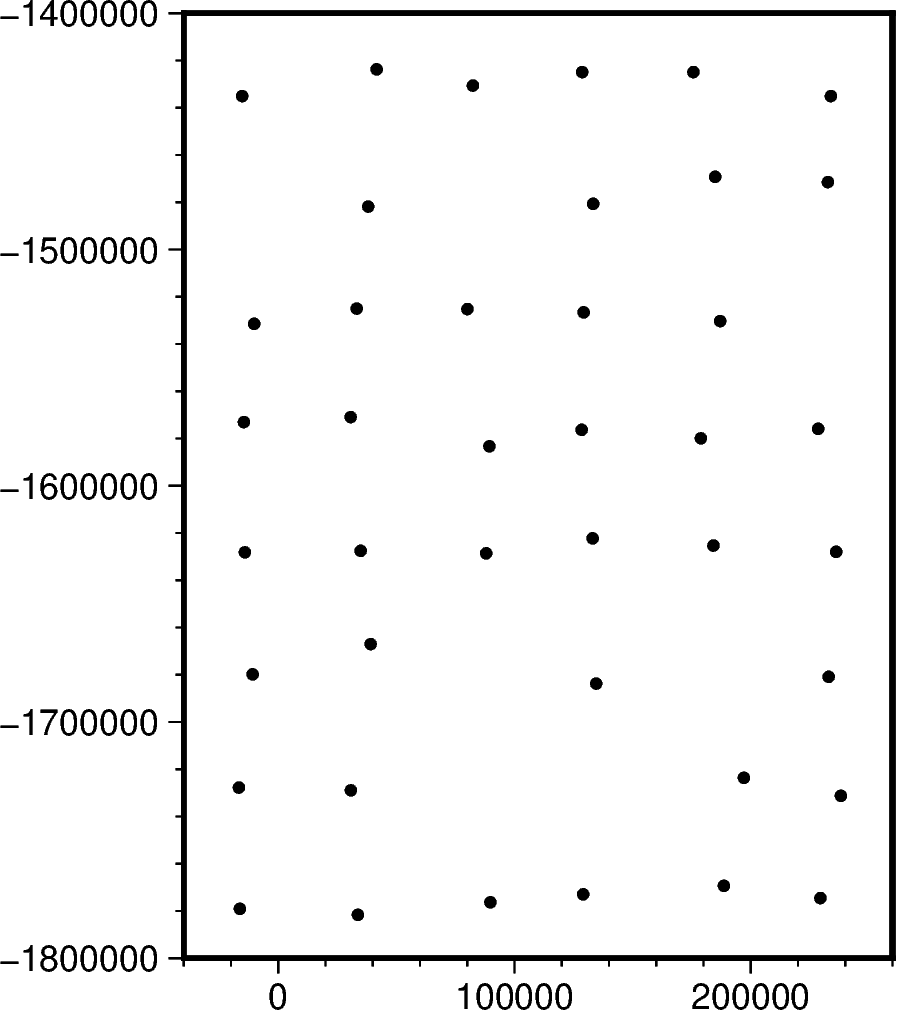

skipping and using already create data
skipping and using already create data
skipping and using already create data
skipping and using already create data
skipping and using already create data
skipping and using already create data
skipping and using already create data


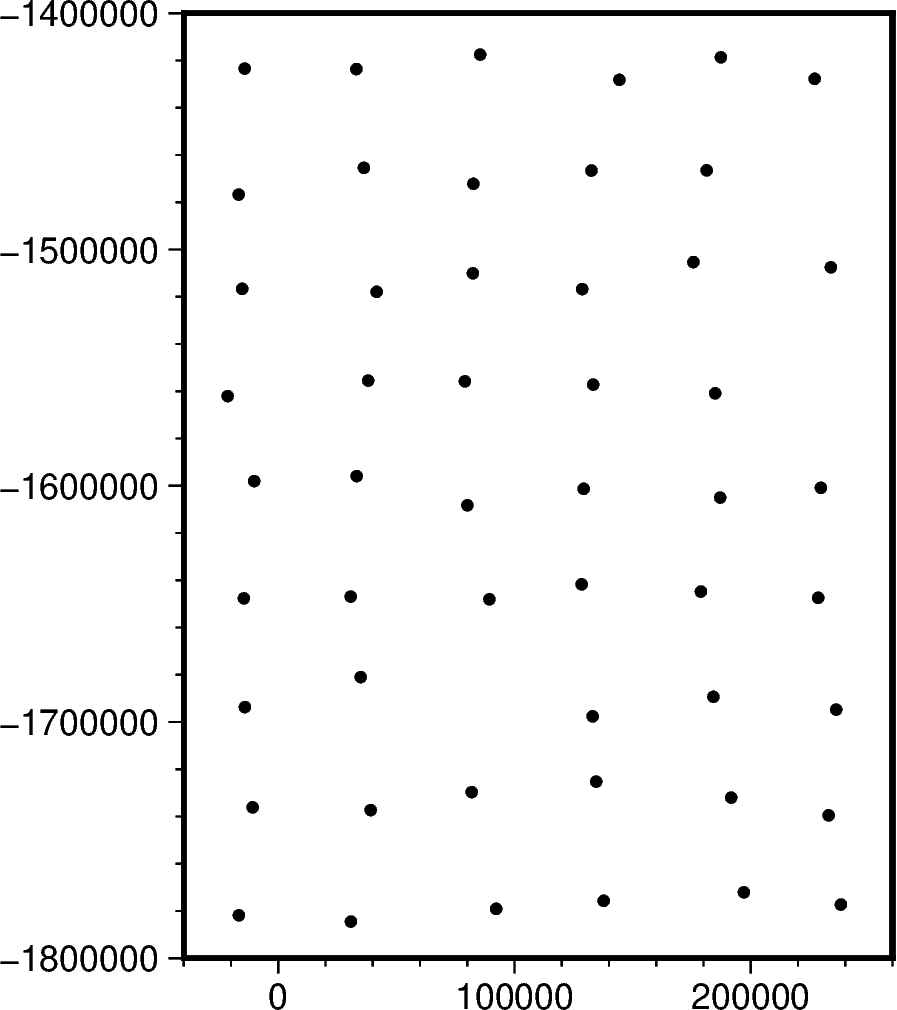

skipping and using already create data
skipping and using already create data
skipping and using already create data
skipping and using already create data
skipping and using already create data
skipping and using already create data
skipping and using already create data


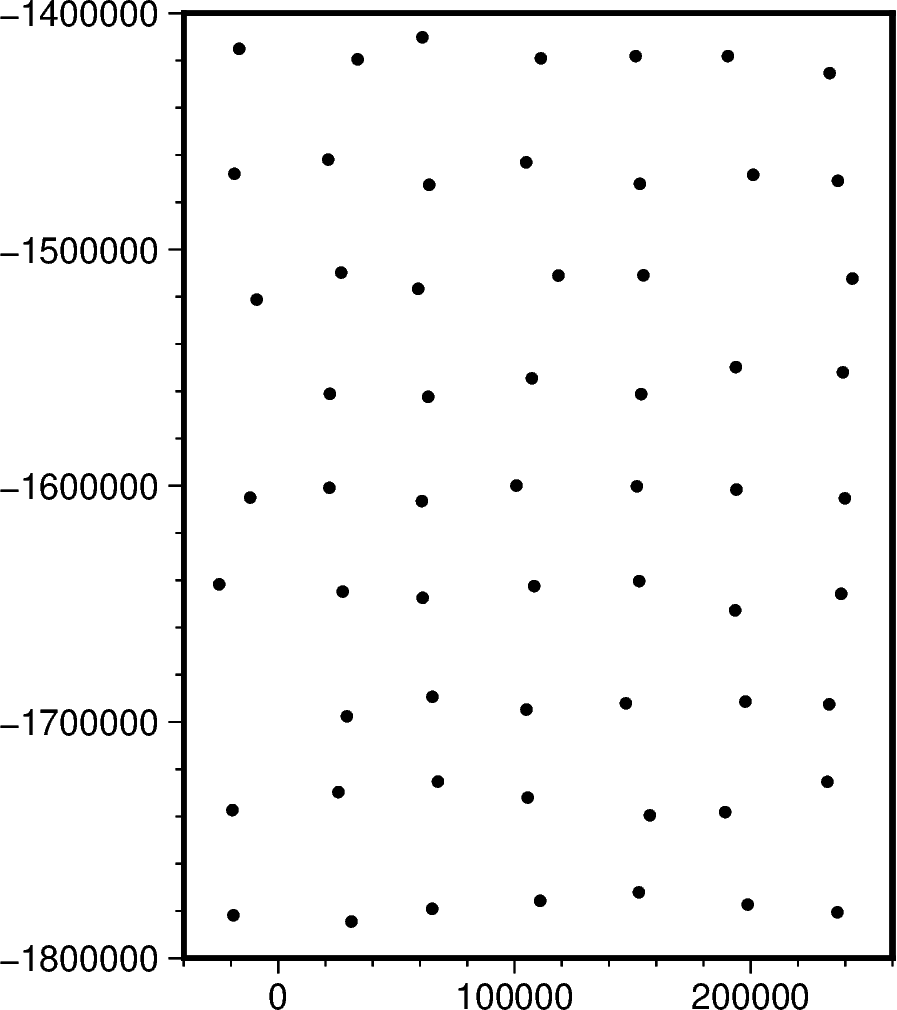

skipping and using already create data
skipping and using already create data
skipping and using already create data
skipping and using already create data
skipping and using already create data
skipping and using already create data
skipping and using already create data


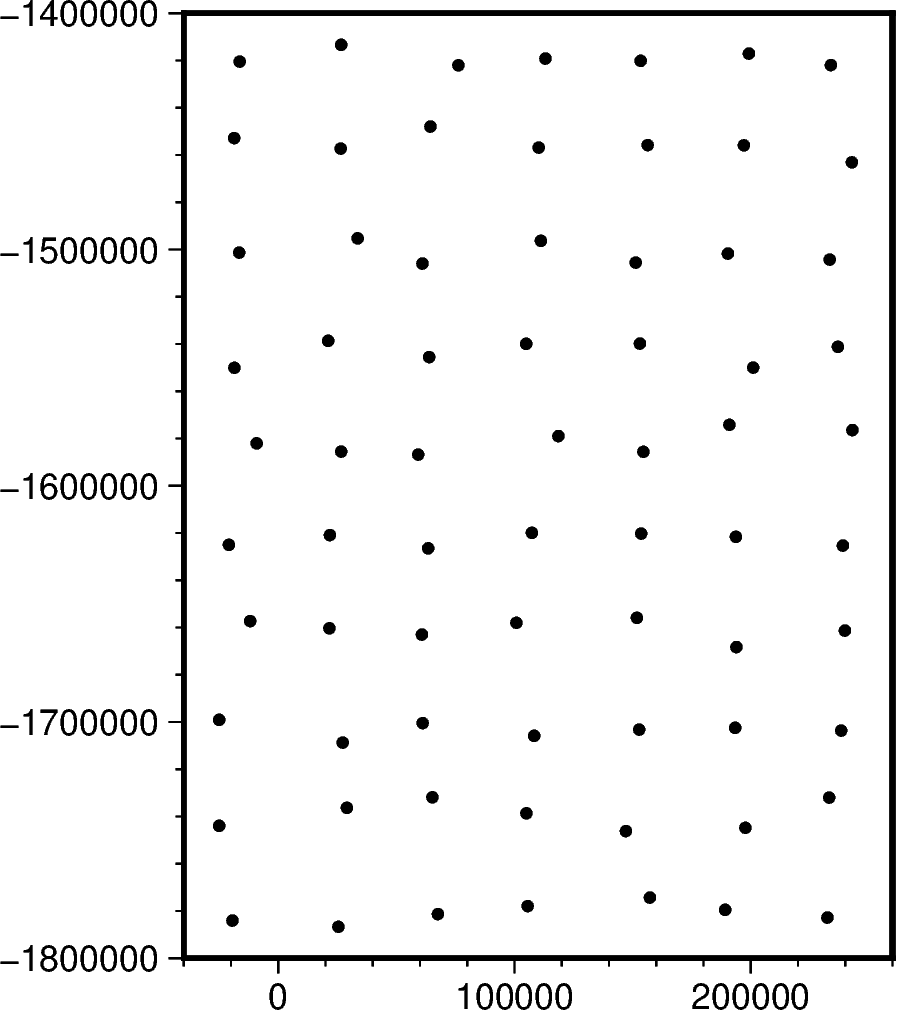

skipping and using already create data
skipping and using already create data
skipping and using already create data
skipping and using already create data
skipping and using already create data
skipping and using already create data
skipping and using already create data


constraint_numbers  regional_strengths  \
0                    4                0.00   
1                    4                7.14   
2                    4               14.29   
3                    4               21.43   
4                    4               28.57   
..                 ...                 ...   
59                  70               21.43   
60                  70               28.57   
61                  70               35.71   
62                  70               42.86   
63                  70               50.00   

                              constraint_points_fname  \
0   ../../results/08_constraint_spacing_vs_regiona...   
1   ../../results/08_constraint_spacing_vs_regiona...   
2   ../../results/08_constraint_spacing_vs_regiona...   
3   ../../results/08_constraint_spacing_vs_regiona...   
4   ../../results/08_constraint_spacing_vs_regiona...   
..                                                ...   
59  ../../results/08_constraint_spacing_vs_regiona...   
60  ../../results/08_constraint_spacing_vs_regiona...   
61  ../../results/08_constraint_spacing_vs_regiona...   
62  ../../results/08_constraint_spacing_vs_regiona...   
63  ../../results/08_constraint_spacing_vs_regiona...   

   constraints_starting_rmse  \
0                   0.034142   
1                   0.034142   
2                   0.034142   
3                   0.034142   
4                   0.034142   
..                       ...   
59                 22.170435   
60                 22.170435   
61                 22.170435   
62                 22.170435   
63                 22.170435   

                            starting_bathymetry_fname constraint_spacing  \
0   ../../results/08_constraint_spacing_vs_regiona...         141.418734   
1   ../../results/08_constraint_spacing_vs_regiona...         141.418734   
2   ../../results/08_constraint_spacing_vs_regiona...         141.418734   
3   ../../results/08_constraint_spacing_vs_regiona...         141.418734   
4   ../../results/08_constraint_spacing_vs_regiona...         141.418734   
..                                                ...                ...   
59  ../../results/08_constraint_spacing_vs_regiona...          35.709316   
60  ../../results/08_constraint_spacing_vs_regiona...          35.709316   
61  ../../results/08_constraint_spacing_vs_regiona...          35.709316   
62  ../../results/08_constraint_spacing_vs_regiona...          35.709316   
63  ../../results/08_constraint_spacing_vs_regiona...          35.709316   

                                starting_prisms_fname  \
0   ../../results/08_constraint_spacing_vs_regiona...   
1   ../../results/08_constraint_spacing_vs_regiona...   
2   ../../results/08_constraint_spacing_vs_regiona...   
3   ../../results/08_constraint_spacing_vs_regiona...   
4   ../../results/08_constraint_spacing_vs_regiona...   
..                                                ...   
59  ../../results/08_constraint_spacing_vs_regiona...   
60  ../../results/08_constraint_spacing_vs_regiona...   
61  ../../results/08_constraint_spacing_vs_regiona...   
62  ../../results/08_constraint_spacing_vs_regiona...   
63  ../../results/08_constraint_spacing_vs_regiona...   

   starting_bathymetry_damping number_of_constraints  \
0                        1e-20                     4   
1                        1e-20                     4   
2                        1e-20                     4   
3                        1e-20                     4   
4                        1e-20                     4   
..                         ...                   ...   
59                       1e-05                    70   
60                       1e-05                    70   
61                       1e-05                    70   
62                       1e-05                    70   
63                       1e-05                    70   

   constraints_per_10000sq_km  
0                    0.333333  
1                    0.333333  
2             

In [116]:
sampled_params_df["constraint_points_fname"] = pd.Series()
sampled_params_df["constraints_starting_rmse"] = pd.Series()
sampled_params_df["starting_bathymetry_fname"] = pd.Series()
sampled_params_df["constraint_spacing"] = pd.Series()
sampled_params_df["starting_prisms_fname"] = pd.Series()
sampled_params_df["starting_bathymetry_damping"] = pd.Series()
sampled_params_df["number_of_constraints"] = pd.Series()
sampled_params_df["constraints_per_10000sq_km"] = pd.Series()

dampings = np.logspace(-20, 1, 8).tolist()  ##### CHANGE THIS TO 8
# dampings.append(None)
starting_topography_kwargs = dict(
    method="splines",
    region=buffer_region,
    spacing=spacing,
    dampings=dampings,
)

for i, row in tqdm(sampled_params_df.iterrows(), total=len(sampled_params_df)):
    # set file names
    constraint_points_fname = f"{ensemble_path}constraint_points_{i}.csv"
    starting_bathymetry_fname = f"{ensemble_path}starting_bathymetry_{i}.nc"
    starting_prisms_fname = f"{ensemble_path}starting_prisms_{i}.nc"

    # check if constraint spacing is already done
    # if so, copy it
    subset_with_same_params = sampled_params_df[
        sampled_params_df.constraint_numbers == row.constraint_numbers
    ]

    if (len(subset_with_same_params) > 1) & (
        subset_with_same_params.constraint_points_fname.iloc[0] is not np.nan
    ):
        # copy and rename files
        shutil.copy(
            subset_with_same_params.constraint_points_fname.iloc[0],
            constraint_points_fname,
        )
        shutil.copy(
            subset_with_same_params.starting_bathymetry_fname.iloc[0],
            starting_bathymetry_fname,
        )
        shutil.copy(
            subset_with_same_params.starting_prisms_fname.iloc[0], starting_prisms_fname
        )

        # copy other columns
        sampled_params_df.loc[i, "constraints_starting_rmse"] = (
            subset_with_same_params.constraints_starting_rmse.iloc[0]
        )
        sampled_params_df.loc[i, "constraint_spacing"] = (
            subset_with_same_params.constraint_spacing.iloc[0]
        )
        sampled_params_df.loc[i, "starting_bathymetry_damping"] = (
            subset_with_same_params.starting_bathymetry_damping.iloc[0]
        )
        sampled_params_df.loc[i, "number_of_constraints"] = (
            subset_with_same_params.number_of_constraints.iloc[0]
        )
        sampled_params_df.loc[i, "constraints_per_10000sq_km"] = (
            subset_with_same_params.constraints_per_10000sq_km.iloc[0]
        )

        print("skipping and using already create data")
    else:
        # make constraint points
        constraint_points = RIS_synth.constraint_layout_number(
            # shape=(row.constraint_numbers, row.constraint_numbers),
            num_constraints=row.constraint_numbers,
            region=inversion_region,
            # padding=-spacing,
            shift_stdev=spacing,
            plot=True,
            seed=5,
        )

        # sample true topography at these points
        constraint_points = utils.sample_grids(
            constraint_points,
            bathymetry,
            "true_upward",
            coord_names=("easting", "northing"),
        )
        constraint_points["upward"] = constraint_points.true_upward

        # # re-sample depths with uncertainty to emulate measurement errors
        # constraint_points.loc[constraint_points.index, "true_uncert"] = row.constraint_noise_levels
        # constraint_points = uncertainty.randomly_sample_data(
        #     seed=0,
        #     data_df=constraint_points,
        #     data_col="upward",
        #     uncert_col="true_uncert",
        # )
        # # create weights column
        # constraint_points["weight"] = 1 / (constraint_points.true_uncert**2)

        # grid the sampled values using verde
        starting_bathymetry = utils.create_topography(
            constraints_df=constraint_points,
            **starting_topography_kwargs,
        )
        try:
            starting_bathymetry.attrs["damping"] = str(
                starting_bathymetry.attrs["damping"]
            )
        except KeyError:
            starting_bathymetry.attrs["damping"] = "None"

        # sample the inverted topography at the constraint points
        constraint_points = utils.sample_grids(
            constraint_points,
            starting_bathymetry,
            "starting_bathymetry",
            coord_names=("easting", "northing"),
        )

        constraints_rmse = utils.rmse(
            constraint_points.true_upward - constraint_points.starting_bathymetry
        )

        zref = 0
        # the true density contrast is 1476 kg/m3
        density_contrast = true_density_contrast  # 1350

        # make density grid
        density_grid = xr.where(
            starting_bathymetry >= zref,
            density_contrast,
            -density_contrast,
        )

        # create layer of prisms
        starting_prisms = utils.grids_to_prisms(
            starting_bathymetry,
            zref,
            density=density_grid,
        )

        # calculate number of constraints
        sampled_params_df.loc[i, "number_of_constraints"] = len(constraint_points)

        # calculate average constraint spacing
        sampled_params_df.loc[i, "constraint_spacing"] = (
            np.median(
                vd.median_distance(
                    (constraint_points.easting, constraint_points.northing),
                    k_nearest=1,
                )
            )
            / 1e3
        )

        # calculate number of constraints per 10000 sq km
        sampled_params_df.loc[i, "constraints_per_10000sq_km"] = (
            len(constraint_points) / inversion_area
        ) * 10e3

        sampled_params_df.loc[i, "constraints_starting_rmse"] = constraints_rmse
        sampled_params_df.loc[i, "starting_bathymetry_damping"] = (
            starting_bathymetry.attrs["damping"]
        )

        # save to files
        constraint_points.to_csv(constraint_points_fname, index=False)
        starting_bathymetry.to_netcdf(starting_bathymetry_fname)
        starting_prisms.to_netcdf(starting_prisms_fname)

    # add to dataframe
    sampled_params_df.loc[i, "constraint_points_fname"] = constraint_points_fname
    sampled_params_df.loc[i, "starting_bathymetry_fname"] = starting_bathymetry_fname
    sampled_params_df.loc[i, "starting_prisms_fname"] = starting_prisms_fname

sampled_params_df

array([ 4, 13, 22, 32, 41, 51, 60, 70])

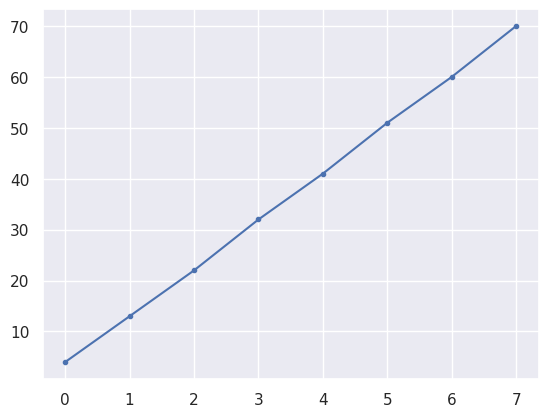

In [117]:
vals = sampled_params_df.constraint_numbers.unique()
pd.Series(vals).plot(marker=".")
vals

array([4, 13, 22, 32, 41, 51, 60, 70], dtype=object)

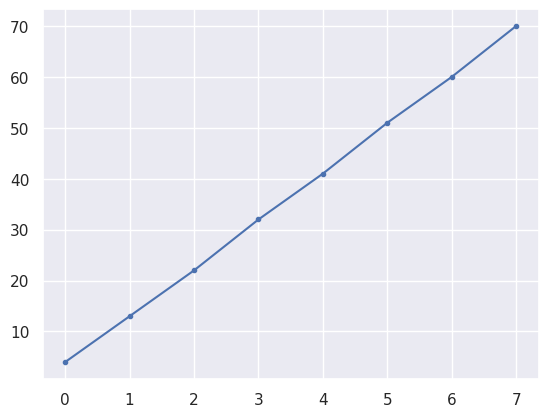

In [118]:
vals = sampled_params_df.number_of_constraints.unique()
pd.Series(vals).plot(marker=".")
vals

array([np.float64(141.4187338585115), np.float64(81.8212702698046),
       np.float64(64.52643760006612), np.float64(53.333042242892056),
       np.float64(45.300367516456674), np.float64(40.689920763874824),
       np.float64(38.83584162199954), np.float64(35.70931630238808)],
      dtype=object)

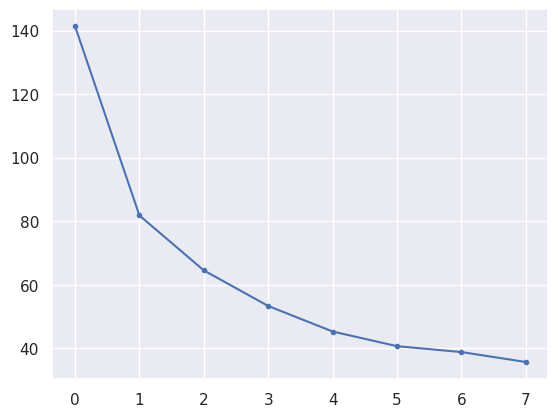

In [119]:
vals = sampled_params_df.constraint_spacing.unique()
pd.Series(vals).plot(marker=".")
vals

array([0.33333333333333337, 1.0833333333333333, 1.8333333333333333,
       2.666666666666667, 3.4166666666666665, 4.25, 5.0,
       5.833333333333334], dtype=object)

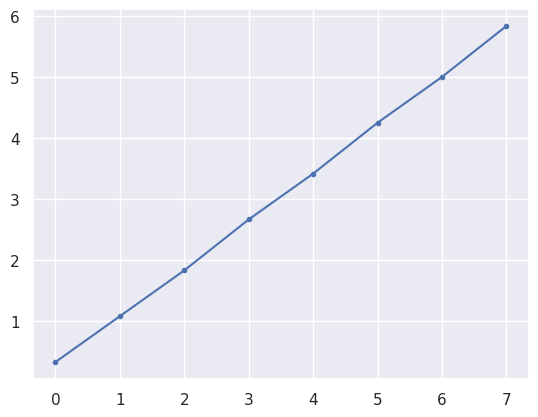

In [120]:
vals = sampled_params_df.constraints_per_10000sq_km.unique()
pd.Series(vals).plot(marker=".")
vals

In [ ]:
sampled_params_df["starting_bathymetry_mae"] = pd.Series()
sampled_params_df["starting_bathymetry_rmse"] = pd.Series()

for i, _row in tqdm(sampled_params_df.iterrows(), total=len(sampled_params_df)):
    starting_bathymetry_fname = f"{ensemble_path}starting_bathymetry_{i}.nc"
    starting_bathymetry = xr.open_dataarray(starting_bathymetry_fname)

    starting_bathymetry_mae = float(np.mean(np.abs(bathymetry - starting_bathymetry)))
    starting_bathymetry_rmse = utils.rmse(bathymetry - starting_bathymetry)

    sampled_params_df.loc[i, "starting_bathymetry_mae"] = starting_bathymetry_mae
    sampled_params_df.loc[i, "starting_bathymetry_rmse"] = starting_bathymetry_rmse
sampled_params_df

  0%|          | 0/64 [00:00<?, ?it/s]

constraint_numbers  regional_strengths  \
0                    4                0.00   
1                    4                7.14   
2                    4               14.29   
3                    4               21.43   
4                    4               28.57   
..                 ...                 ...   
59                  70               21.43   
60                  70               28.57   
61                  70               35.71   
62                  70               42.86   
63                  70               50.00   

                              constraint_points_fname  \
0   ../../results/08_constraint_spacing_vs_regiona...   
1   ../../results/08_constraint_spacing_vs_regiona...   
2   ../../results/08_constraint_spacing_vs_regiona...   
3   ../../results/08_constraint_spacing_vs_regiona...   
4   ../../results/08_constraint_spacing_vs_regiona...   
..                                                ...   
59  ../../results/08_constraint_spacing_vs_regiona...   
60  ../../results/08_constraint_spacing_vs_regiona...   
61  ../../results/08_constraint_spacing_vs_regiona...   
62  ../../results/08_constraint_spacing_vs_regiona...   
63  ../../results/08_constraint_spacing_vs_regiona...   

   constraints_starting_rmse  \
0                   0.034142   
1                   0.034142   
2                   0.034142   
3                   0.034142   
4                   0.034142   
..                       ...   
59                 22.170435   
60                 22.170435   
61                 22.170435   
62                 22.170435   
63                 22.170435   

                            starting_bathymetry_fname constraint_spacing  \
0   ../../results/08_constraint_spacing_vs_regiona...         141.418734   
1   ../../results/08_constraint_spacing_vs_regiona...         141.418734   
2   ../../results/08_constraint_spacing_vs_regiona...         141.418734   
3   ../../results/08_constraint_spacing_vs_regiona...         141.418734   
4   ../../results/08_constraint_spacing_vs_regiona...         141.418734   
..                                                ...                ...   
59  ../../results/08_constraint_spacing_vs_regiona...          35.709316   
60  ../../results/08_constraint_spacing_vs_regiona...          35.709316   
61  ../../results/08_constraint_spacing_vs_regiona...          35.709316   
62  ../../results/08_constraint_spacing_vs_regiona...          35.709316   
63  ../../results/08_constraint_spacing_vs_regiona...          35.709316   

                                starting_prisms_fname  \
0   ../../results/08_constraint_spacing_vs_regiona...   
1   ../../results/08_constraint_spacing_vs_regiona...   
2   ../../results/08_constraint_spacing_vs_regiona...   
3   ../../results/08_constraint_spacing_vs_regiona...   
4   ../../results/08_constraint_spacing_vs_regiona...   
..                                                ...   
59  ../../results/08_constraint_spacing_vs_regiona...   
60  ../../results/08_constraint_spacing_vs_regiona...   
61  ../../results/08_constraint_spacing_vs_regiona...   
62  ../../results/08_constraint_spacing_vs_regiona...   
63  ../../results/08_constraint_spacing_vs_regiona...   

   starting_bathymetry_damping number_of_constraints  \
0                        1e-20                     4   
1                        1e-20                     4   
2                        1e-20                     4   
3                        1e-20                     4   
4                        1e-20                     4   
..                         ...                   ...   
59                       1e-05                    70   
60                       1e-05                    70   
61                       1e-05                    70   
62                       1e-05                    70   
63                       1e-05                    70   

   constraints_per_10000sq_km starting_bathymetry_mae starting_bathymetry_rmse  
0                    0.333333

In [122]:
sampled_params_df.to_csv(ensemble_fname, index=False)

In [123]:
sampled_params_df = pd.read_csv(ensemble_fname)
sampled_params_df.head()

constraint_numbers  regional_strengths  \
0                   4                0.00   
1                   4                7.14   
2                   4               14.29   
3                   4               21.43   
4                   4               28.57   

                             constraint_points_fname  \
0  ../../results/08_constraint_spacing_vs_regiona...   
1  ../../results/08_constraint_spacing_vs_regiona...   
2  ../../results/08_constraint_spacing_vs_regiona...   
3  ../../results/08_constraint_spacing_vs_regiona...   
4  ../../results/08_constraint_spacing_vs_regiona...   

   constraints_starting_rmse  \
0                   0.034142   
1                   0.034142   
2                   0.034142   
3                   0.034142   
4                   0.034142   

                           starting_bathymetry_fname  constraint_spacing  \
0  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
1  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
2  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
3  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
4  ../../results/08_constraint_spacing_vs_regiona...          141.418734   

                               starting_prisms_fname  \
0  ../../results/08_constraint_spacing_vs_regiona...   
1  ../../results/08_constraint_spacing_vs_regiona...   
2  ../../results/08_constraint_spacing_vs_regiona...   
3  ../../results/08_constraint_spacing_vs_regiona...   
4  ../../results/08_constraint_spacing_vs_regiona...   

   starting_bathymetry_damping  number_of_constraints  \
0                 1.000000e-20                      4   
1                 1.000000e-20                      4   
2                 1.000000e-20                      4   
3                 1.000000e-20                      4   
4                 1.000000e-20                      4   

   constraints_per_10000sq_km  starting_bathymetry_mae  \
0                    0.333333               516.567897   
1                    0.333333               516.567897   
2                    0.333333               516.567897   
3                    0.333333               516.567897   
4                    0.333333               516.567897   

   starting_bathymetry_rmse  
0                682.098767  
1                682.098767  
2                682.098767  
3                682.098767  
4                682.098767

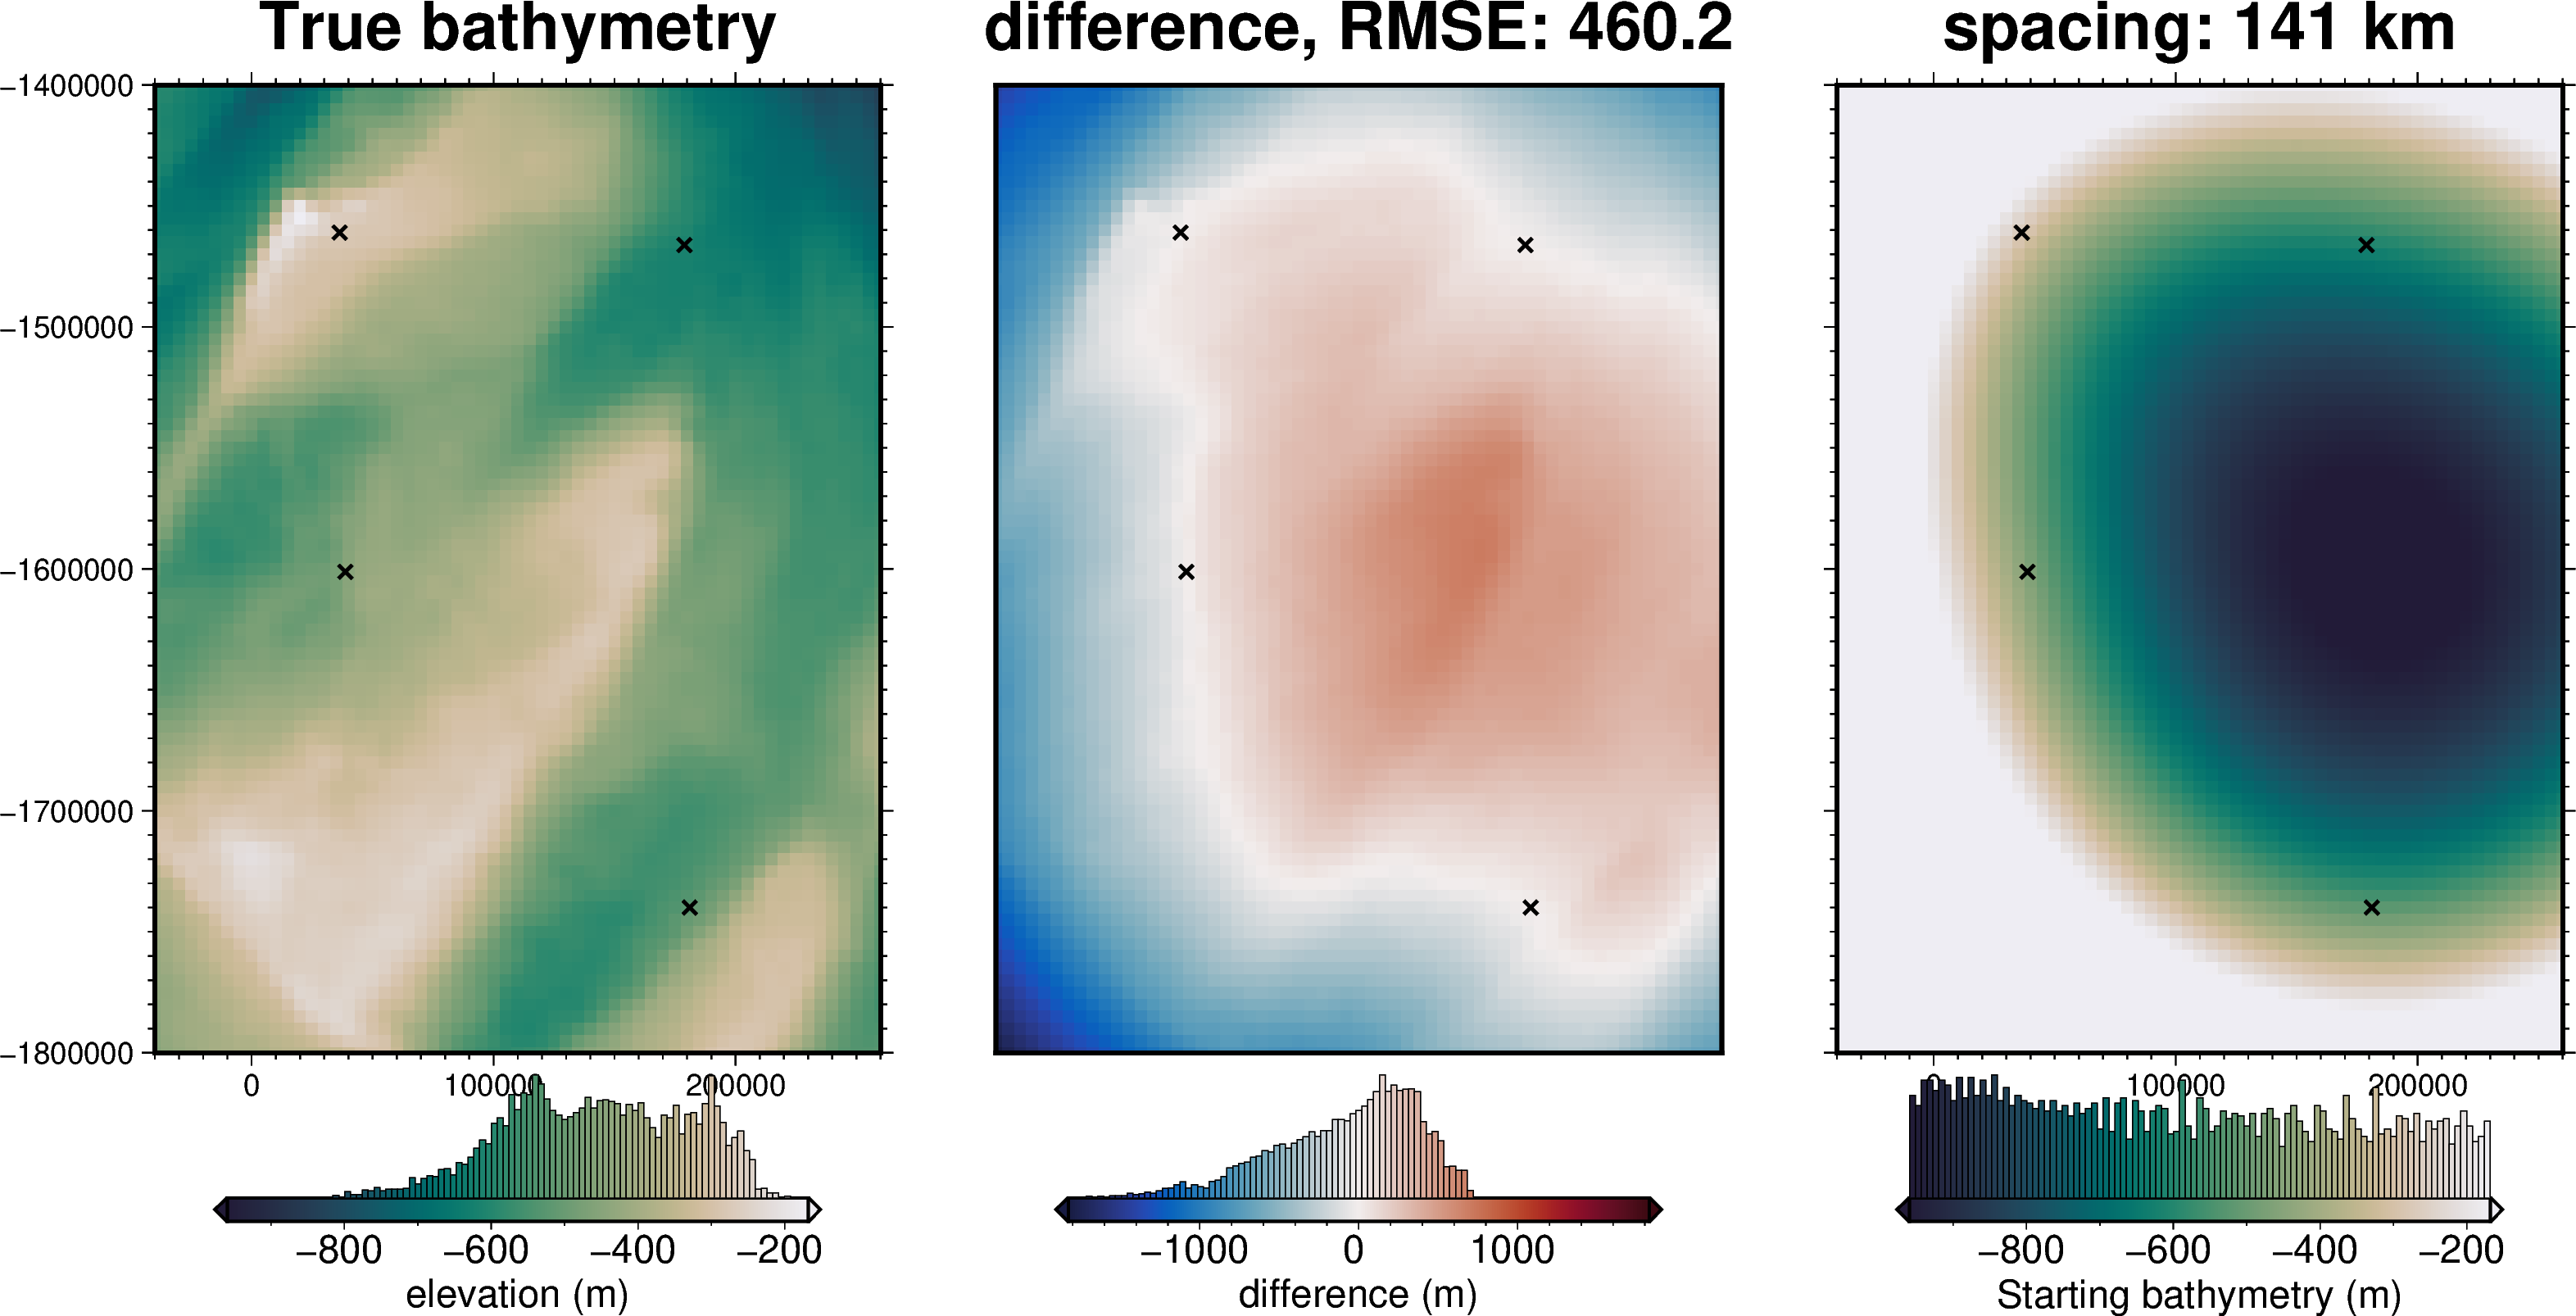

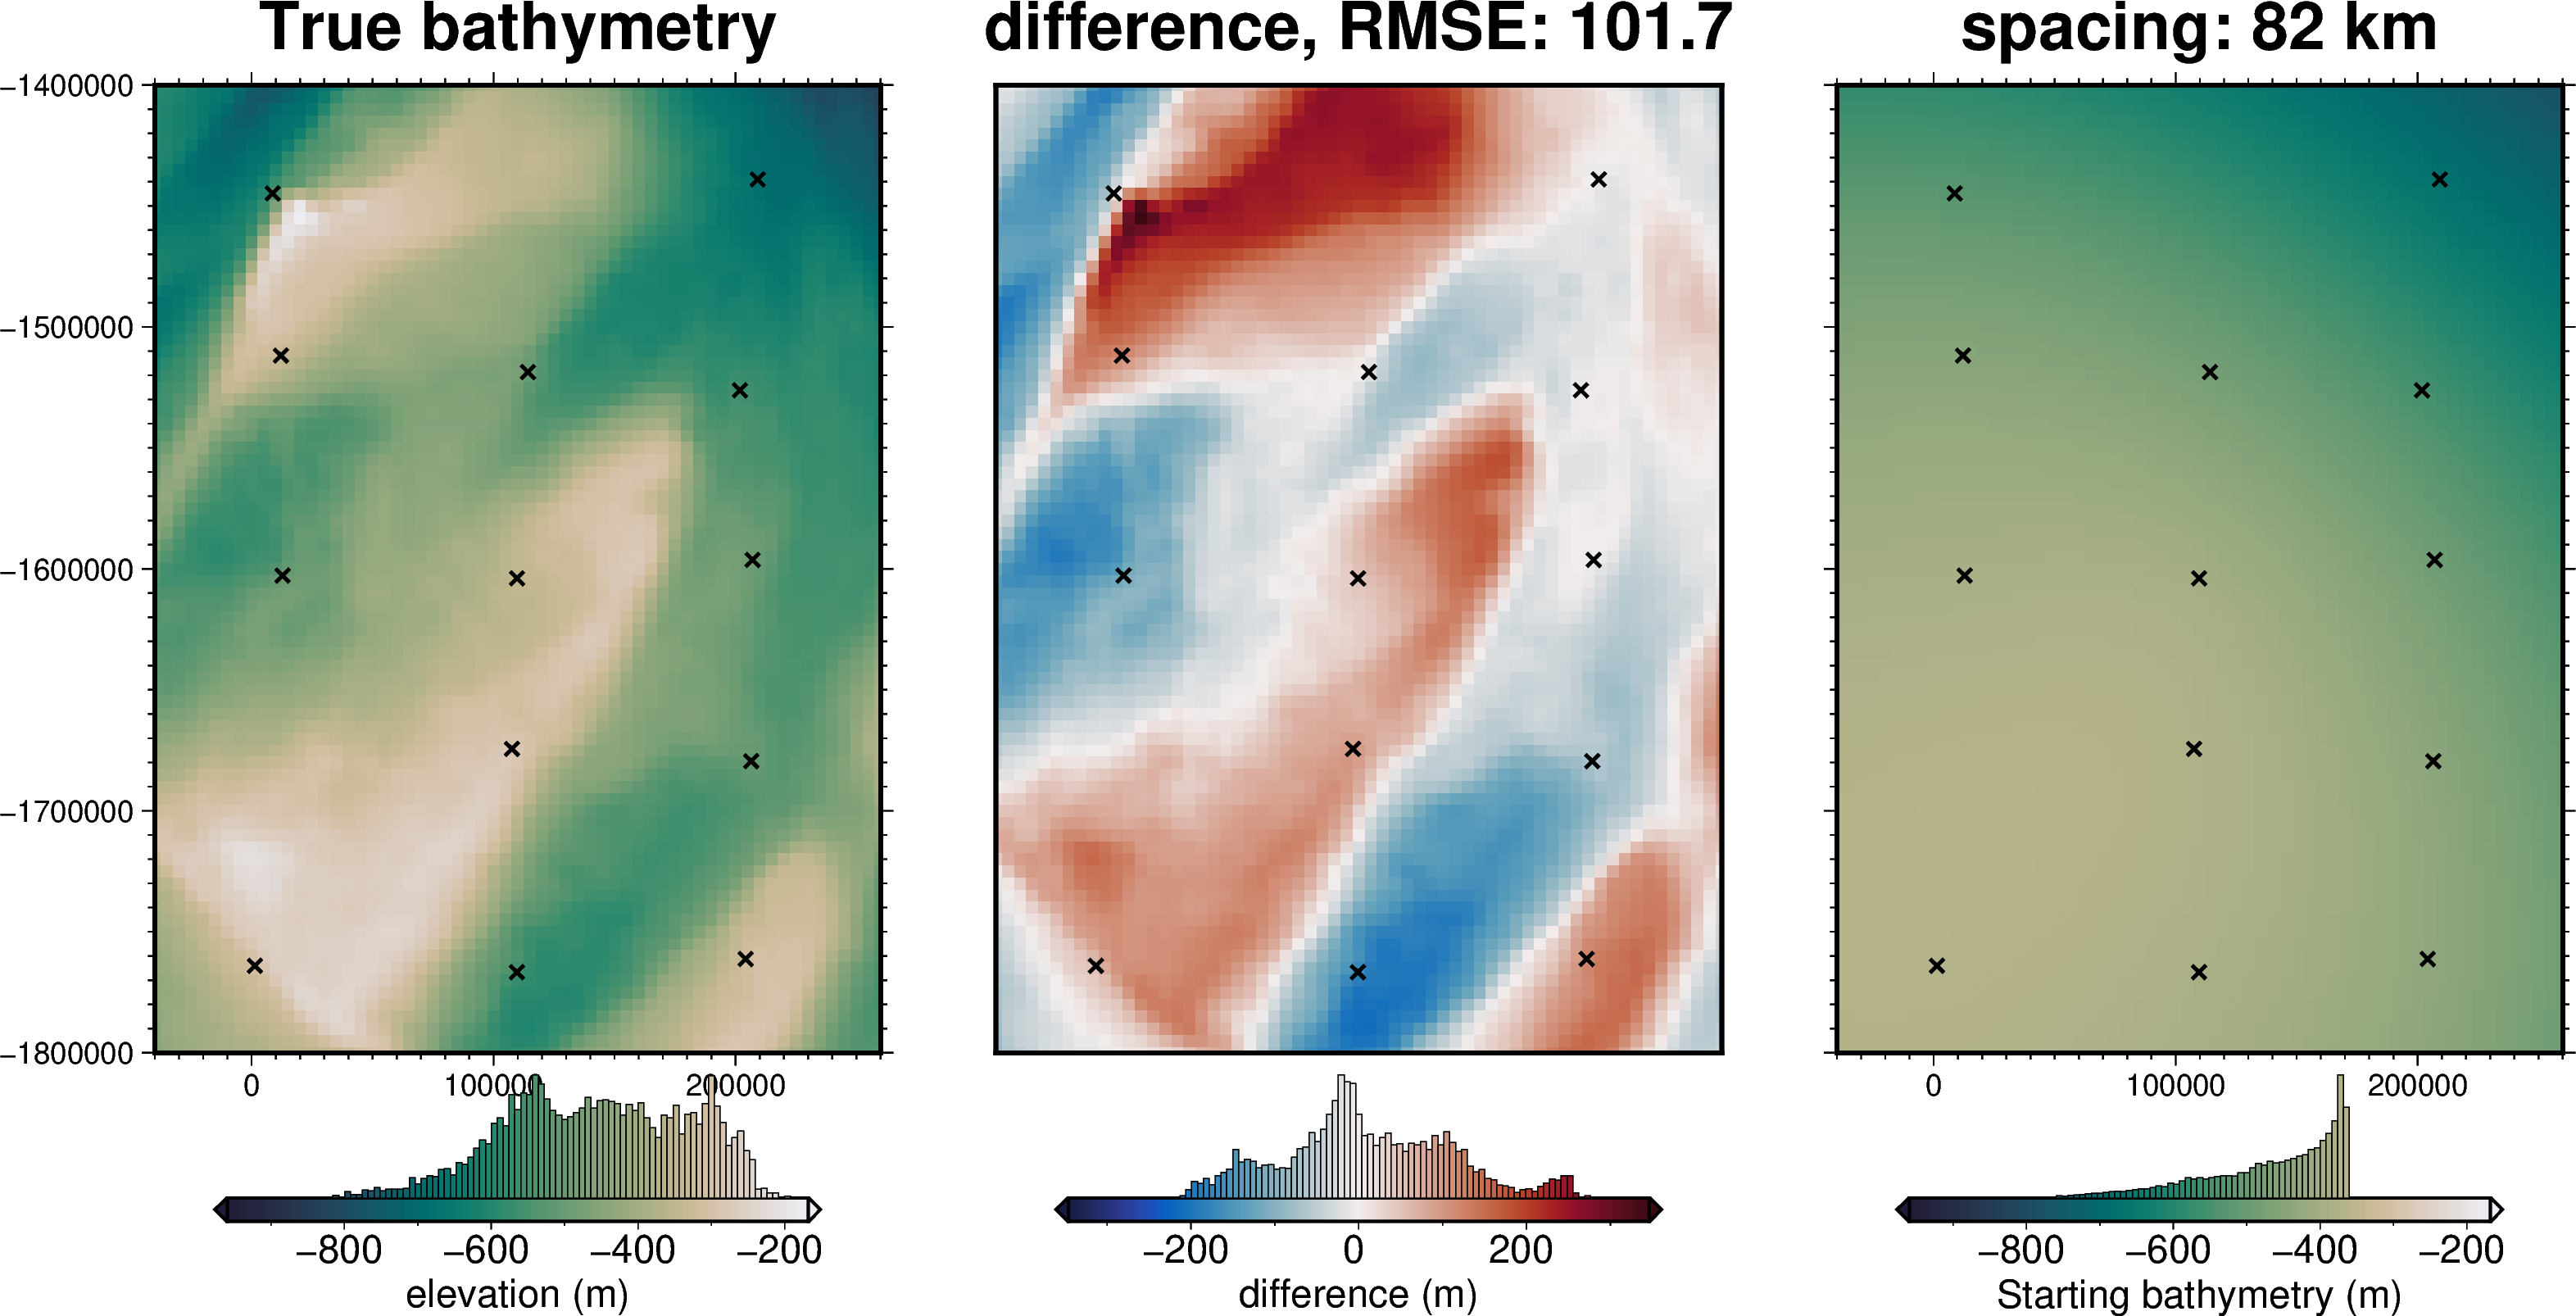

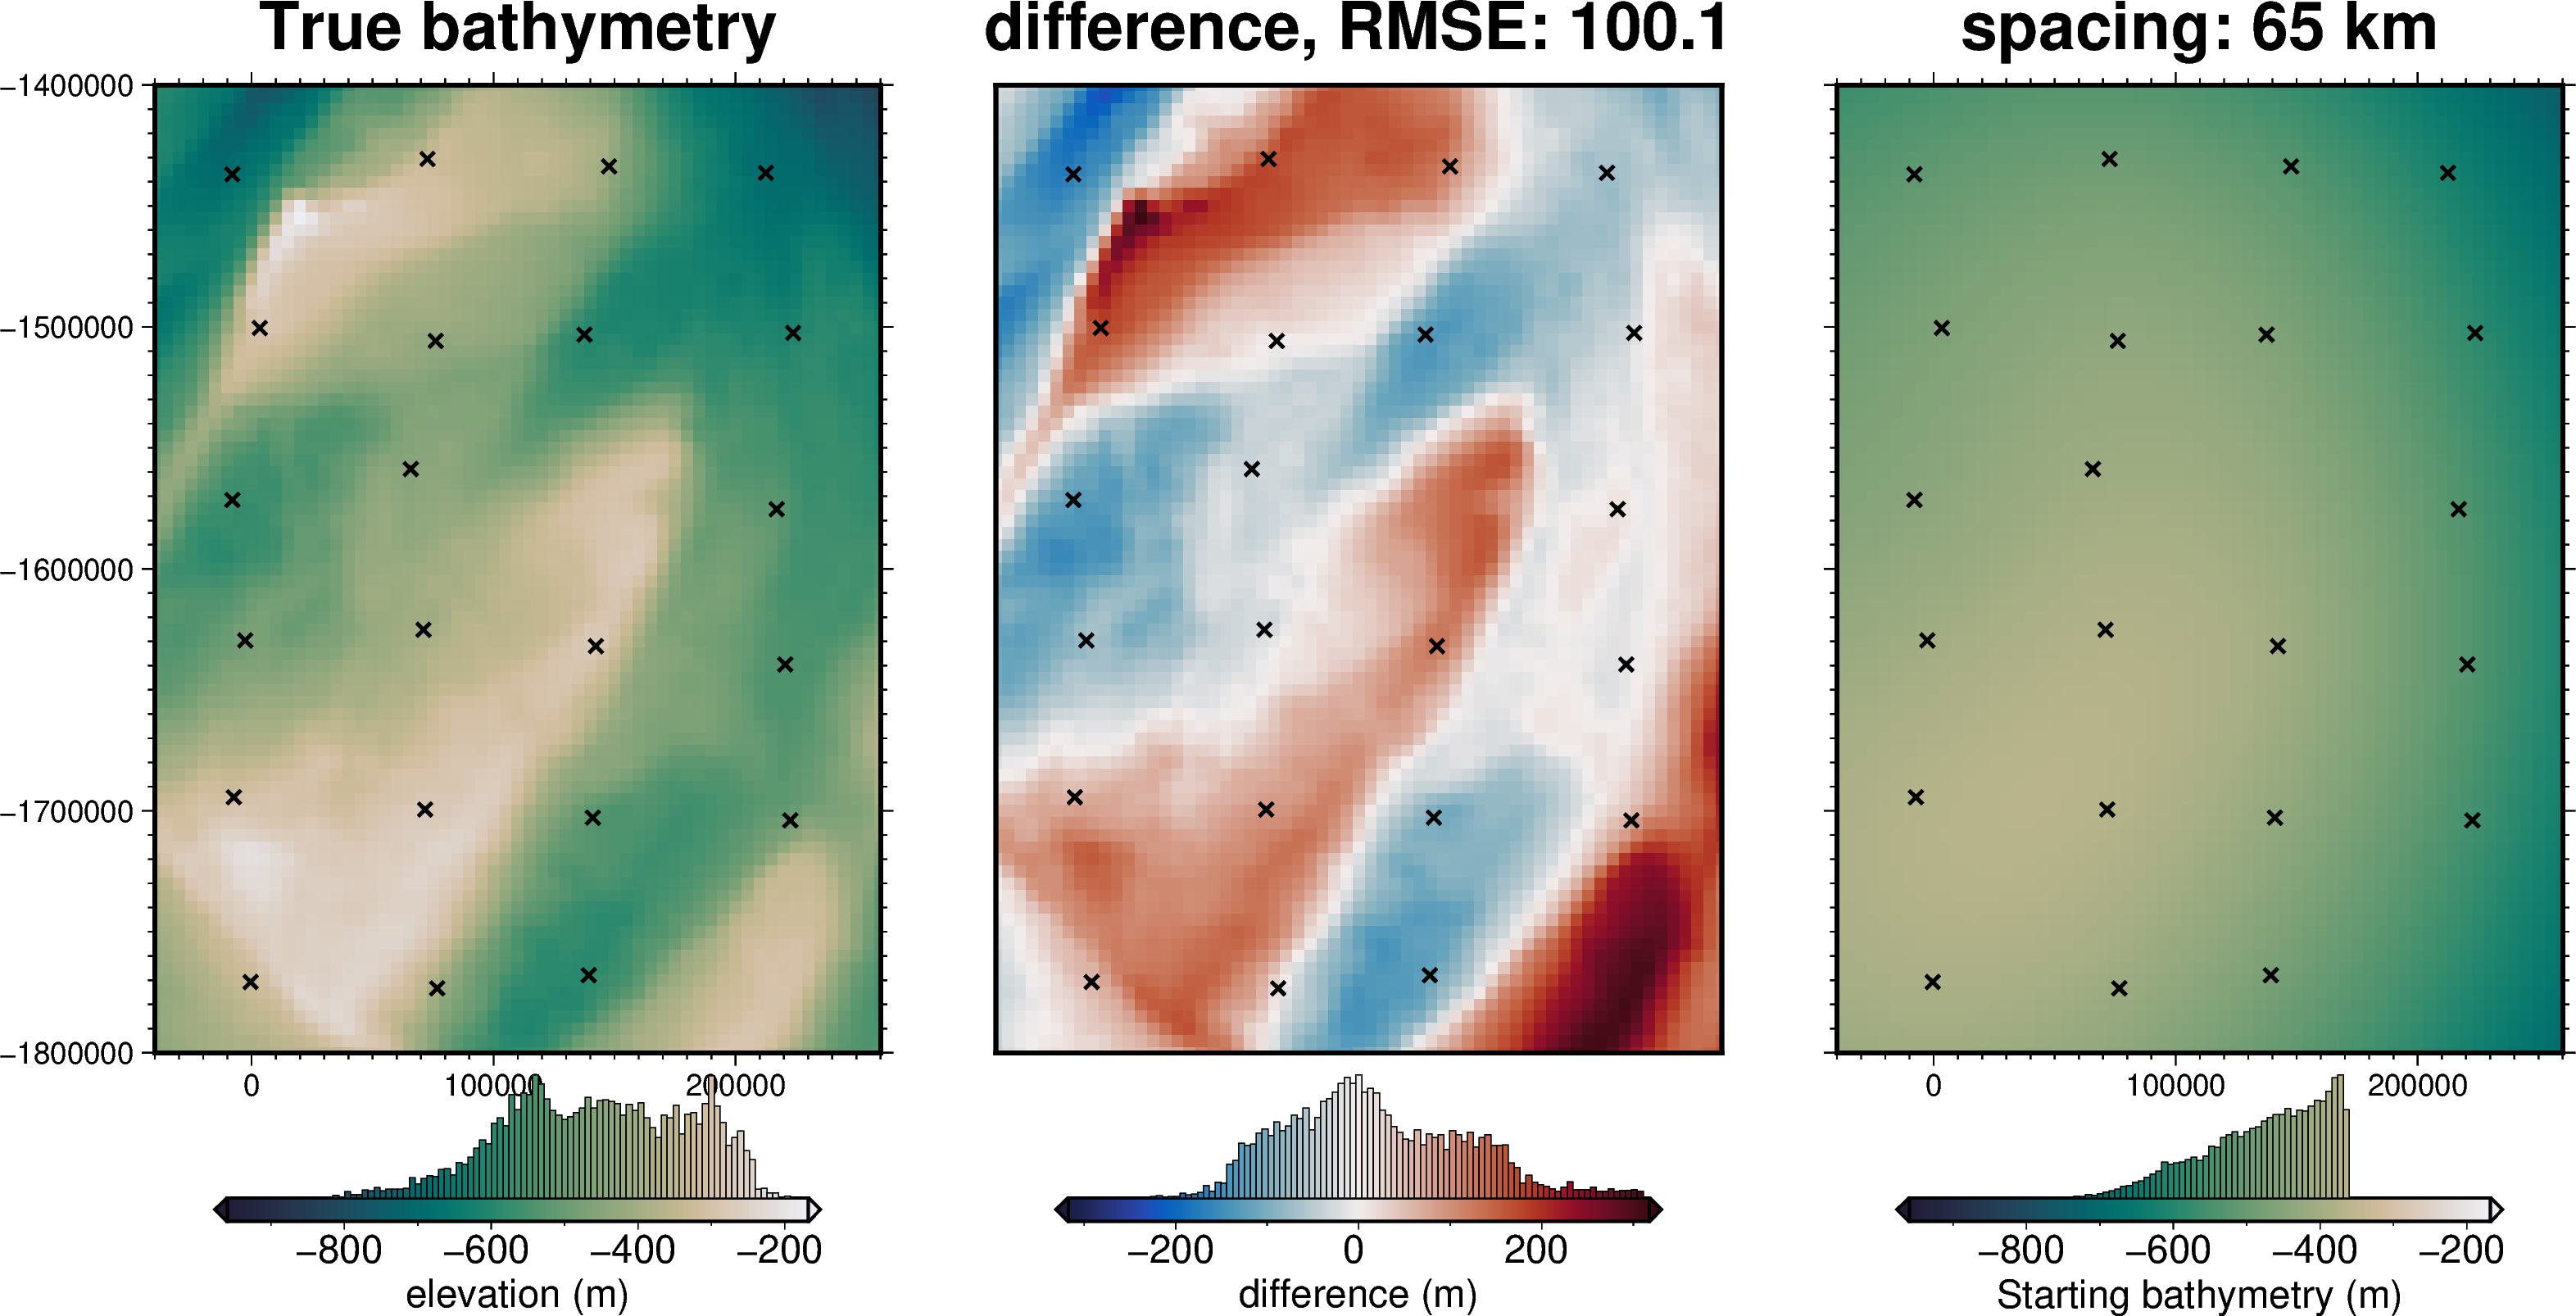

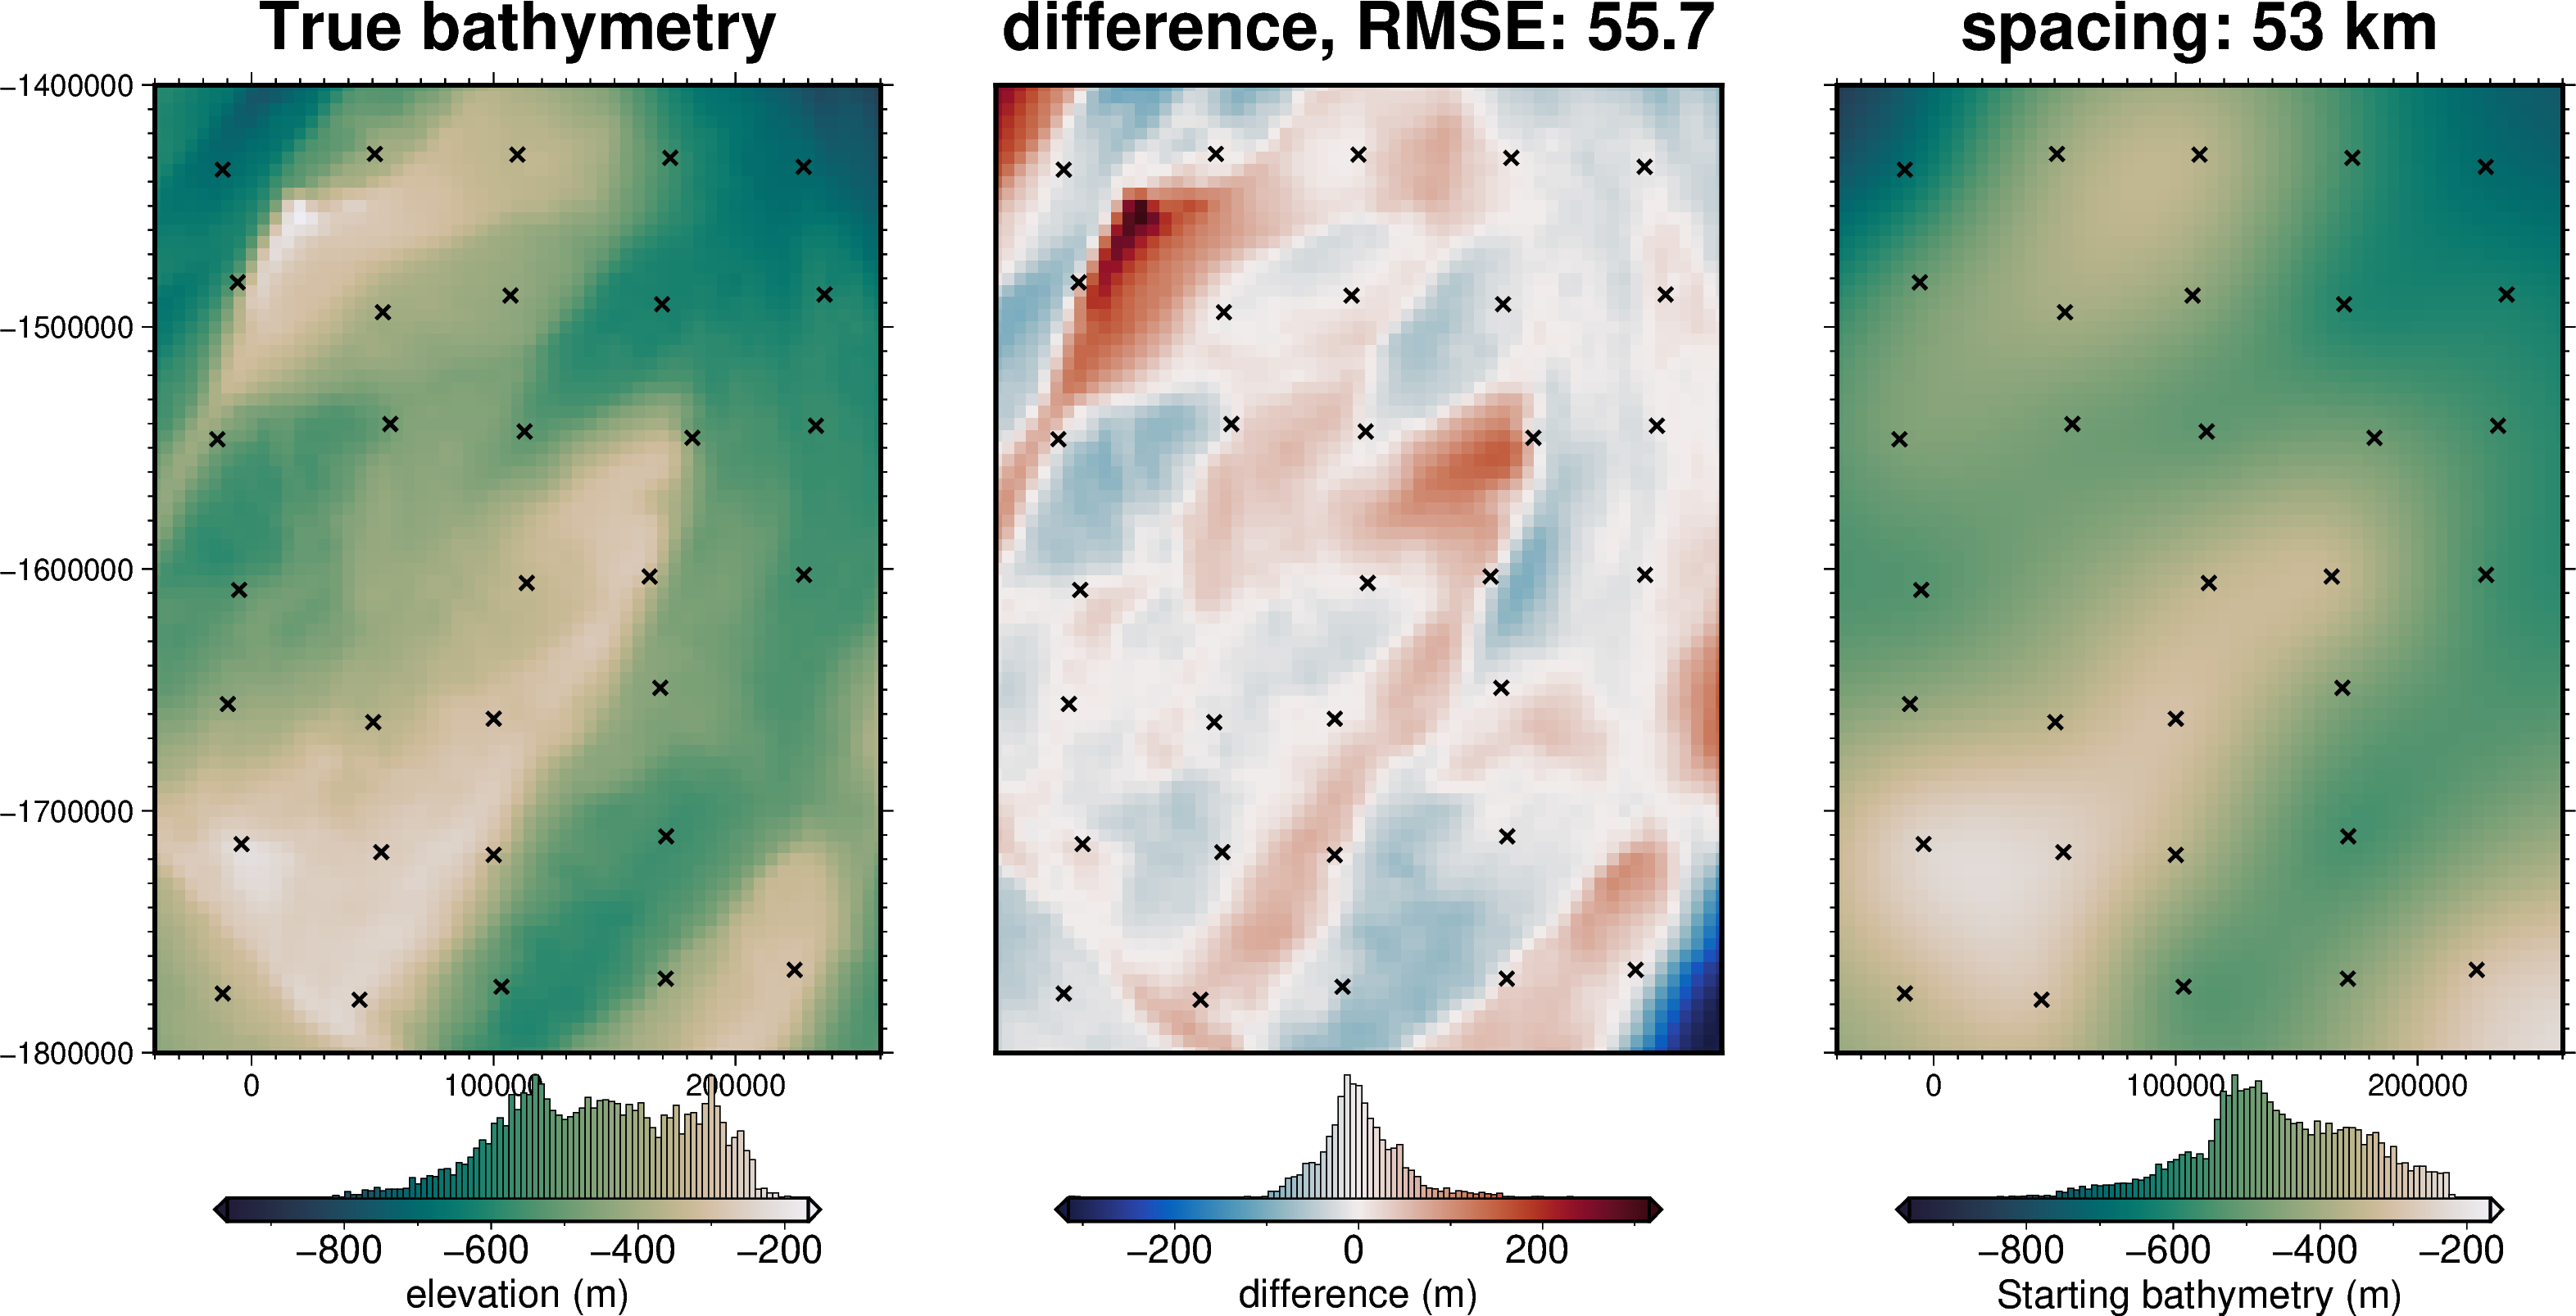

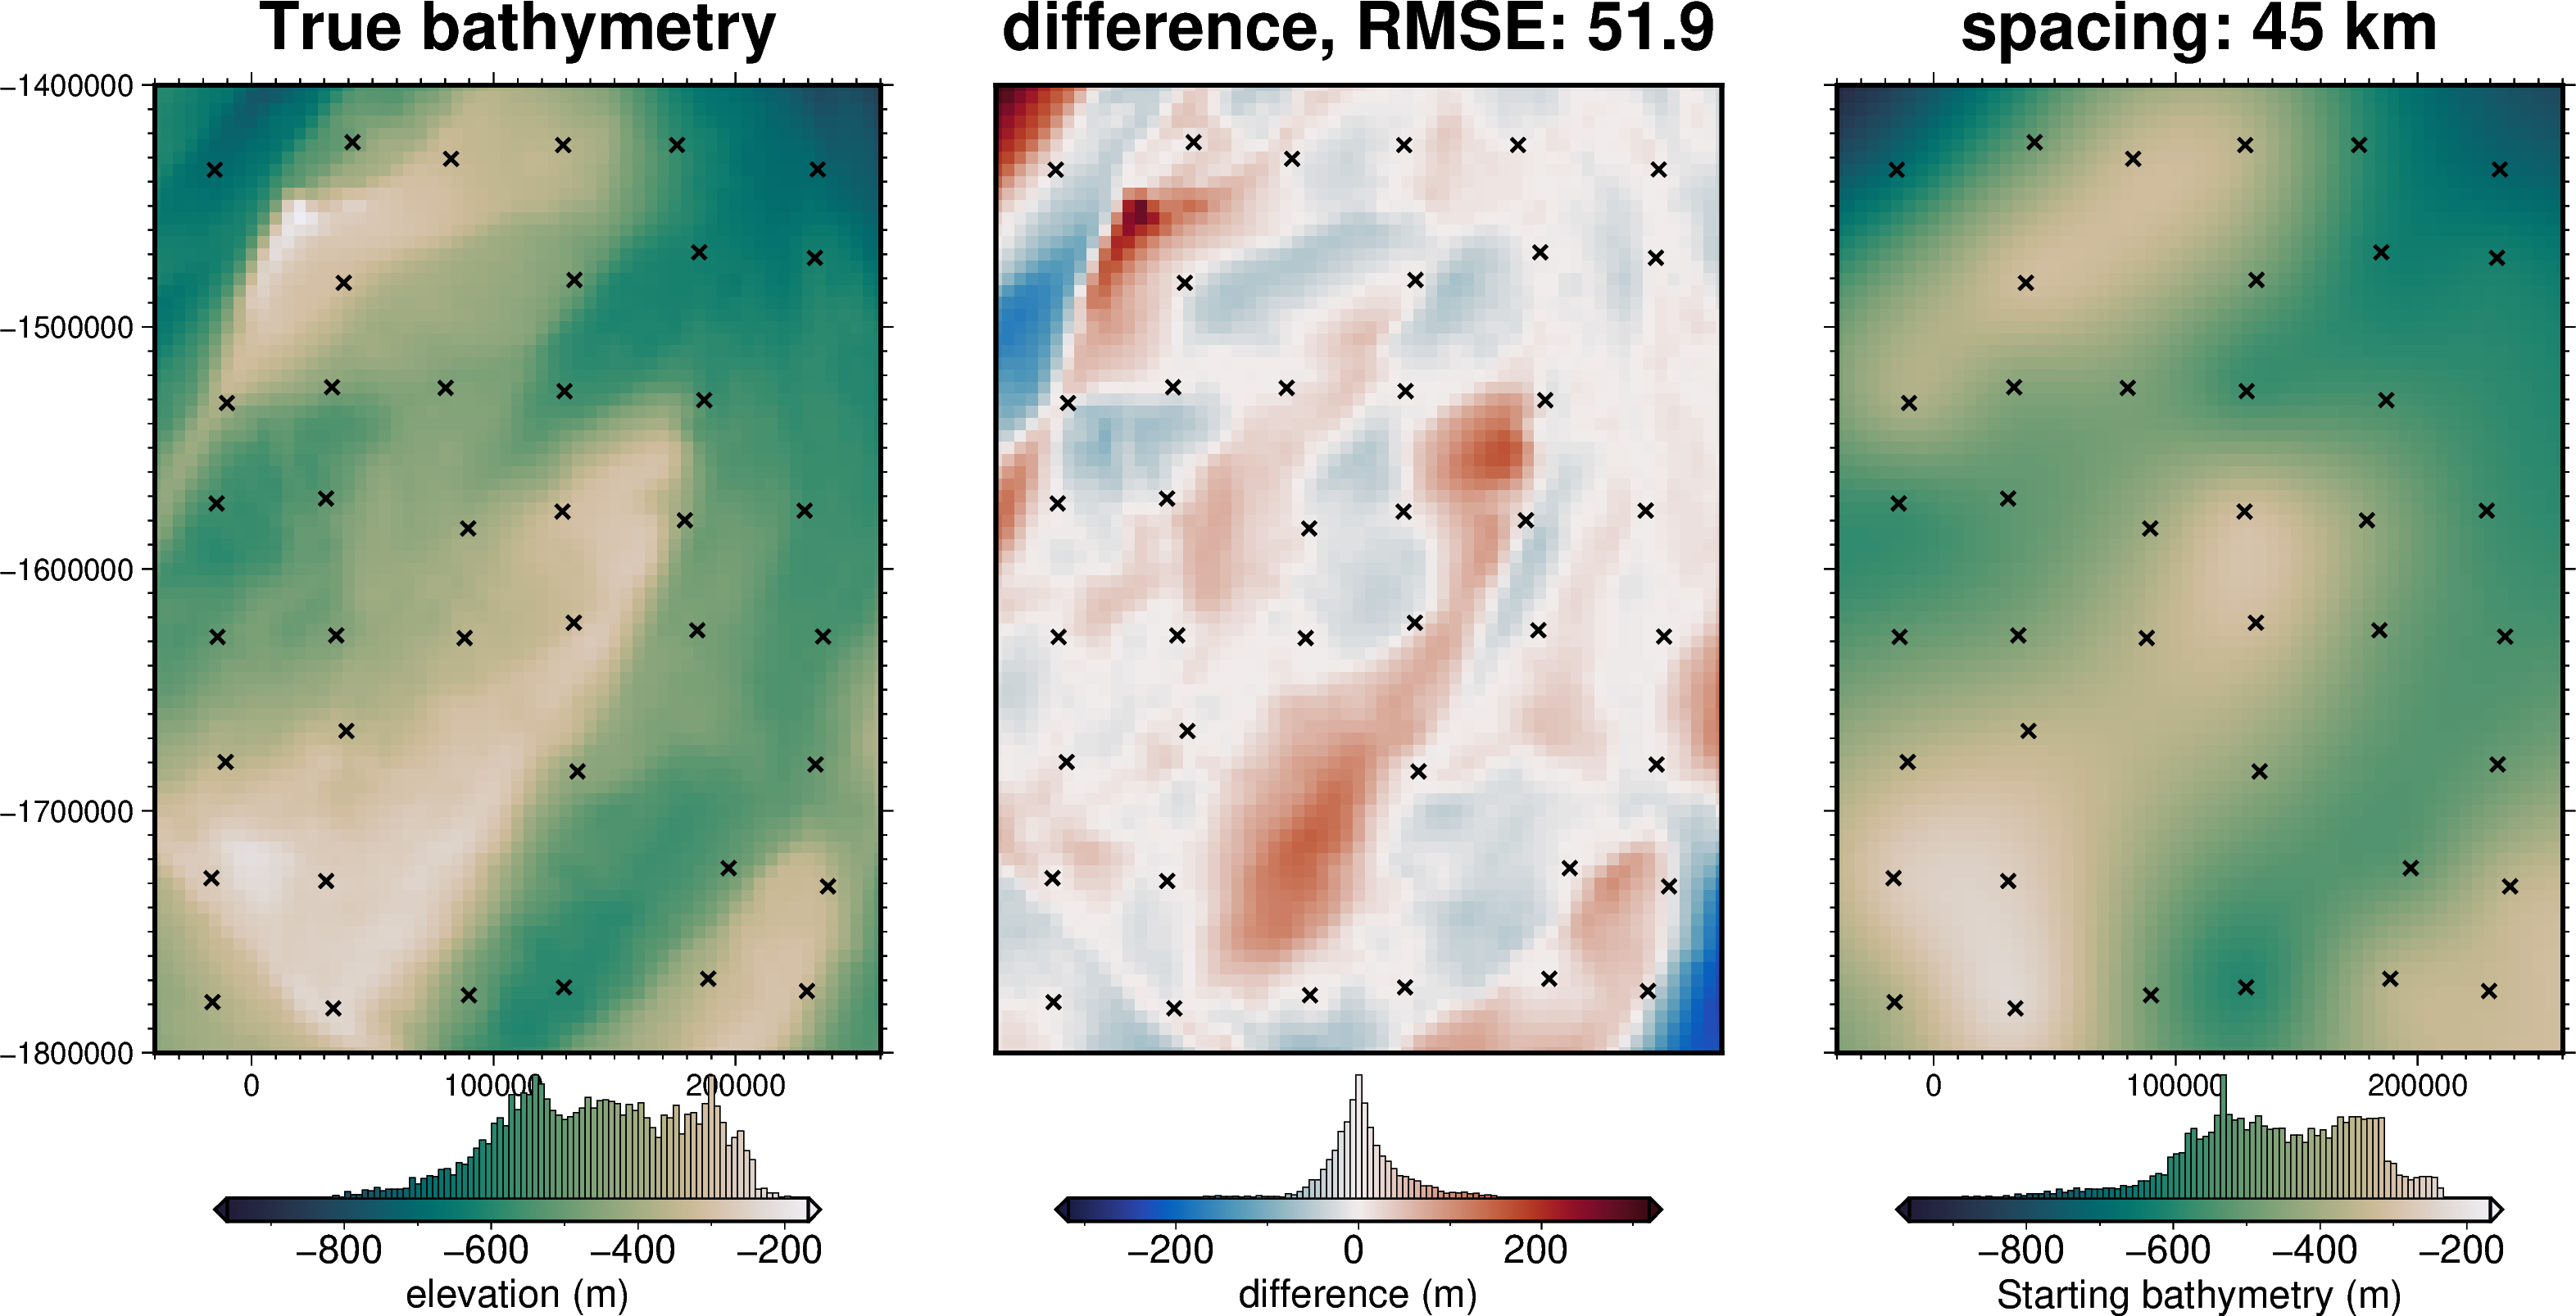

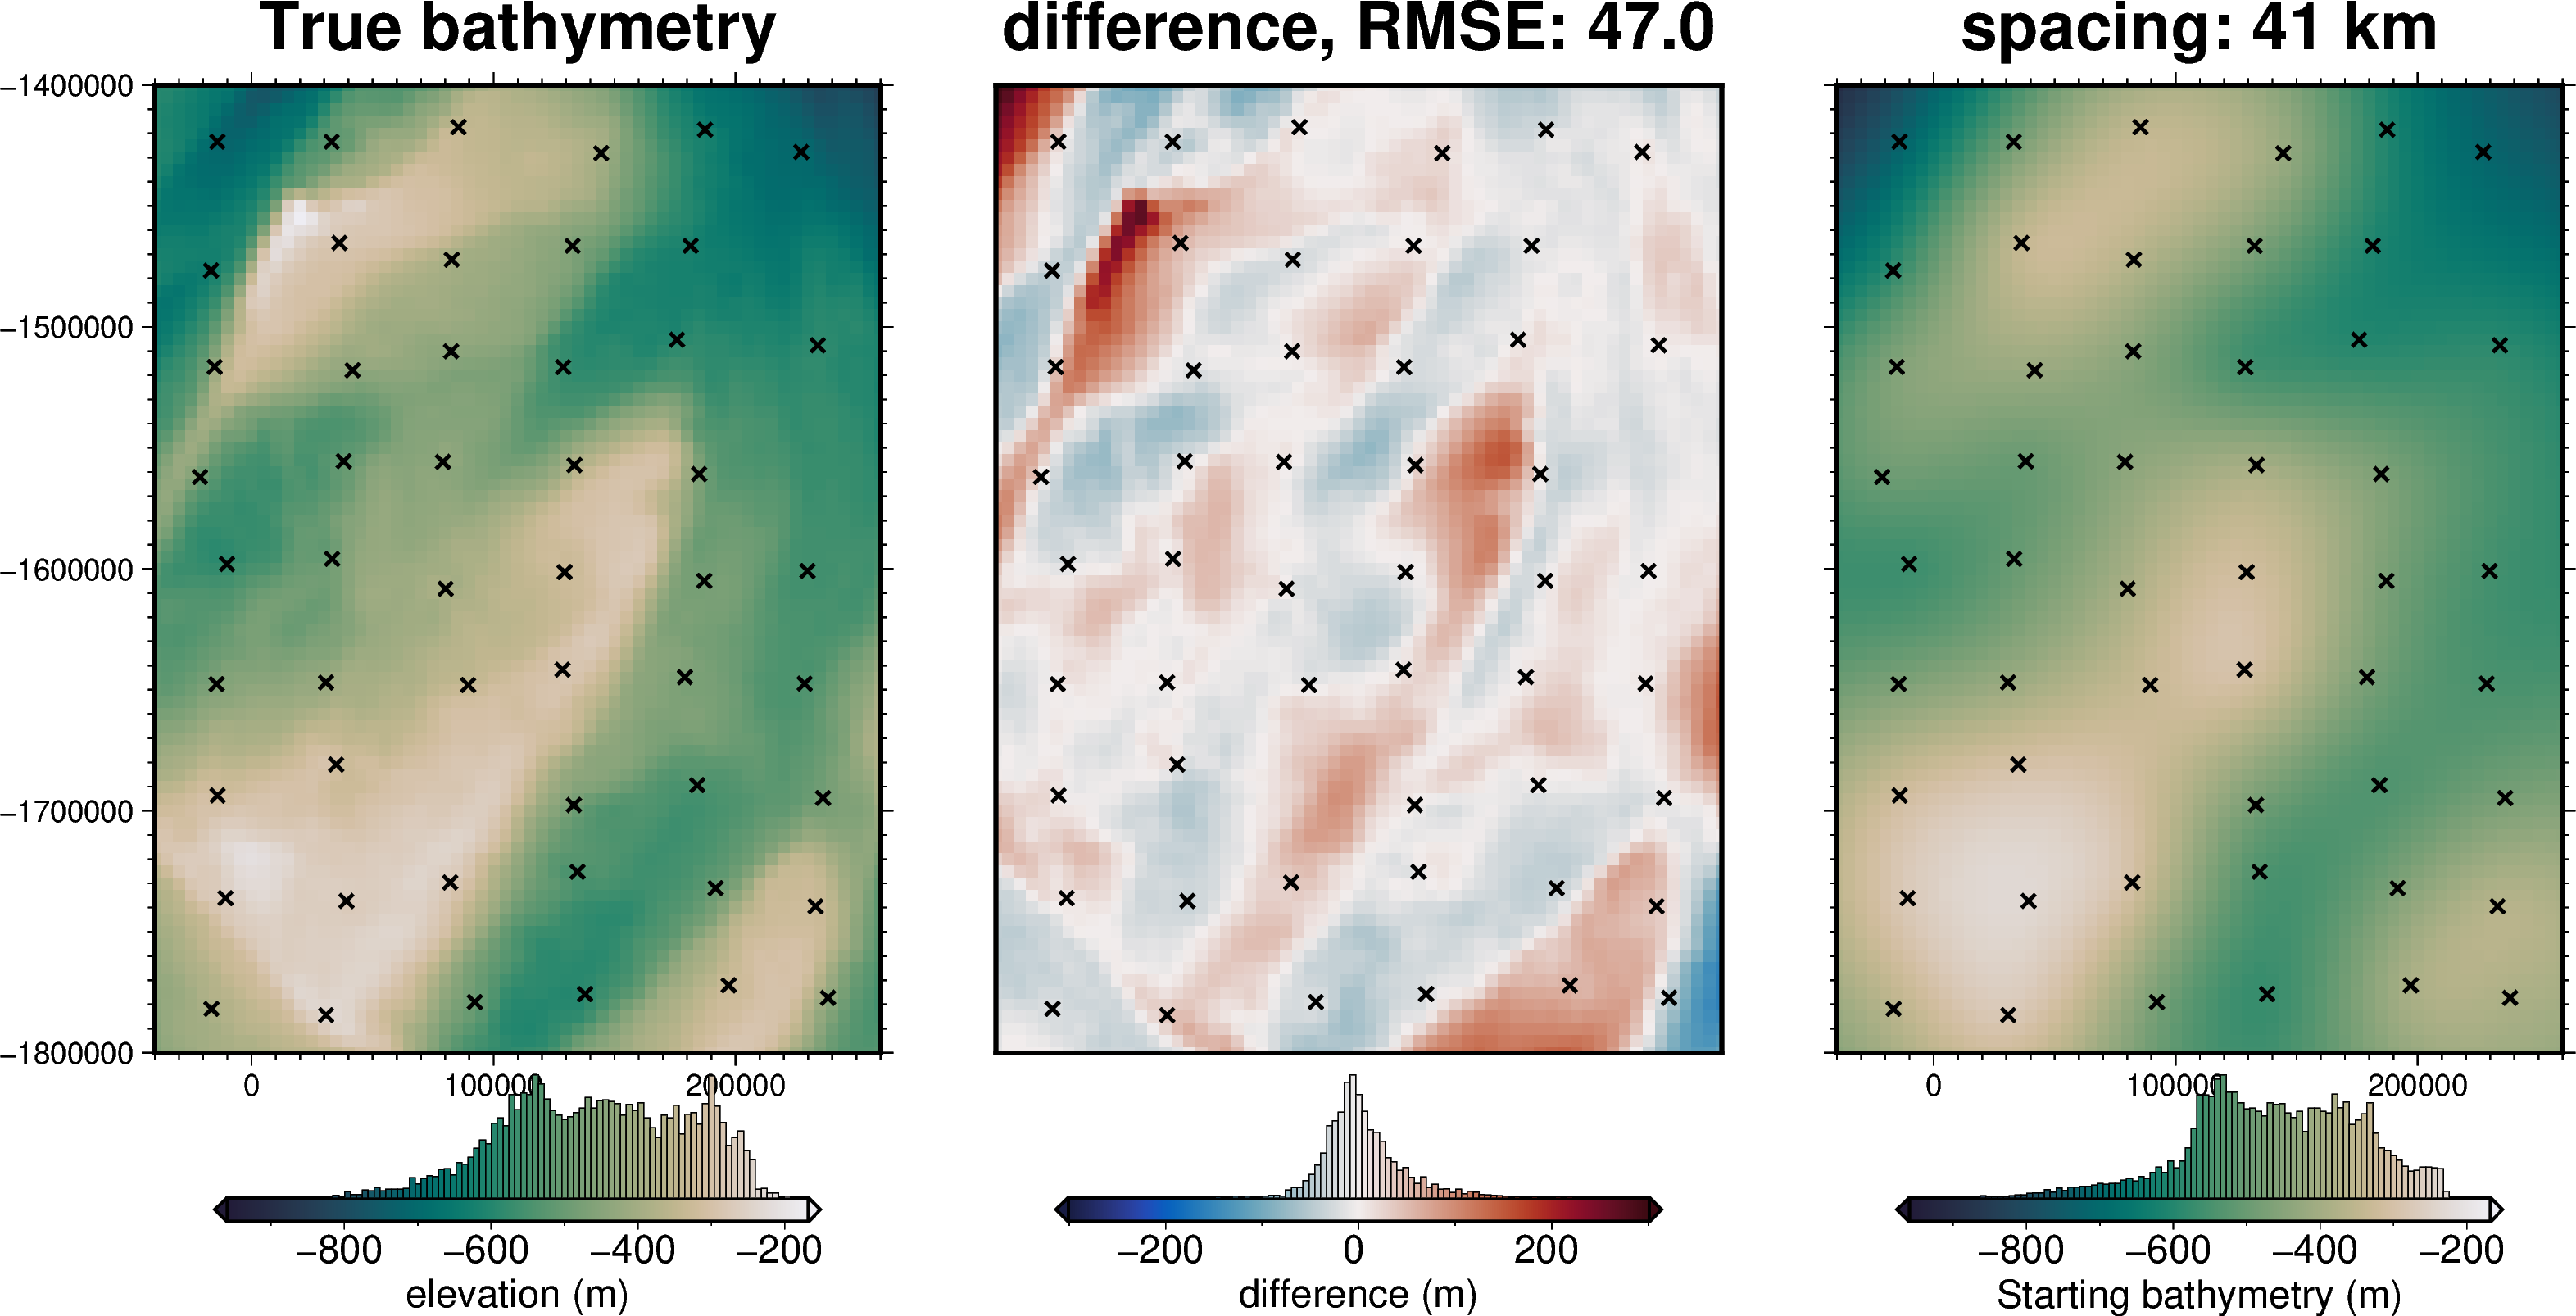

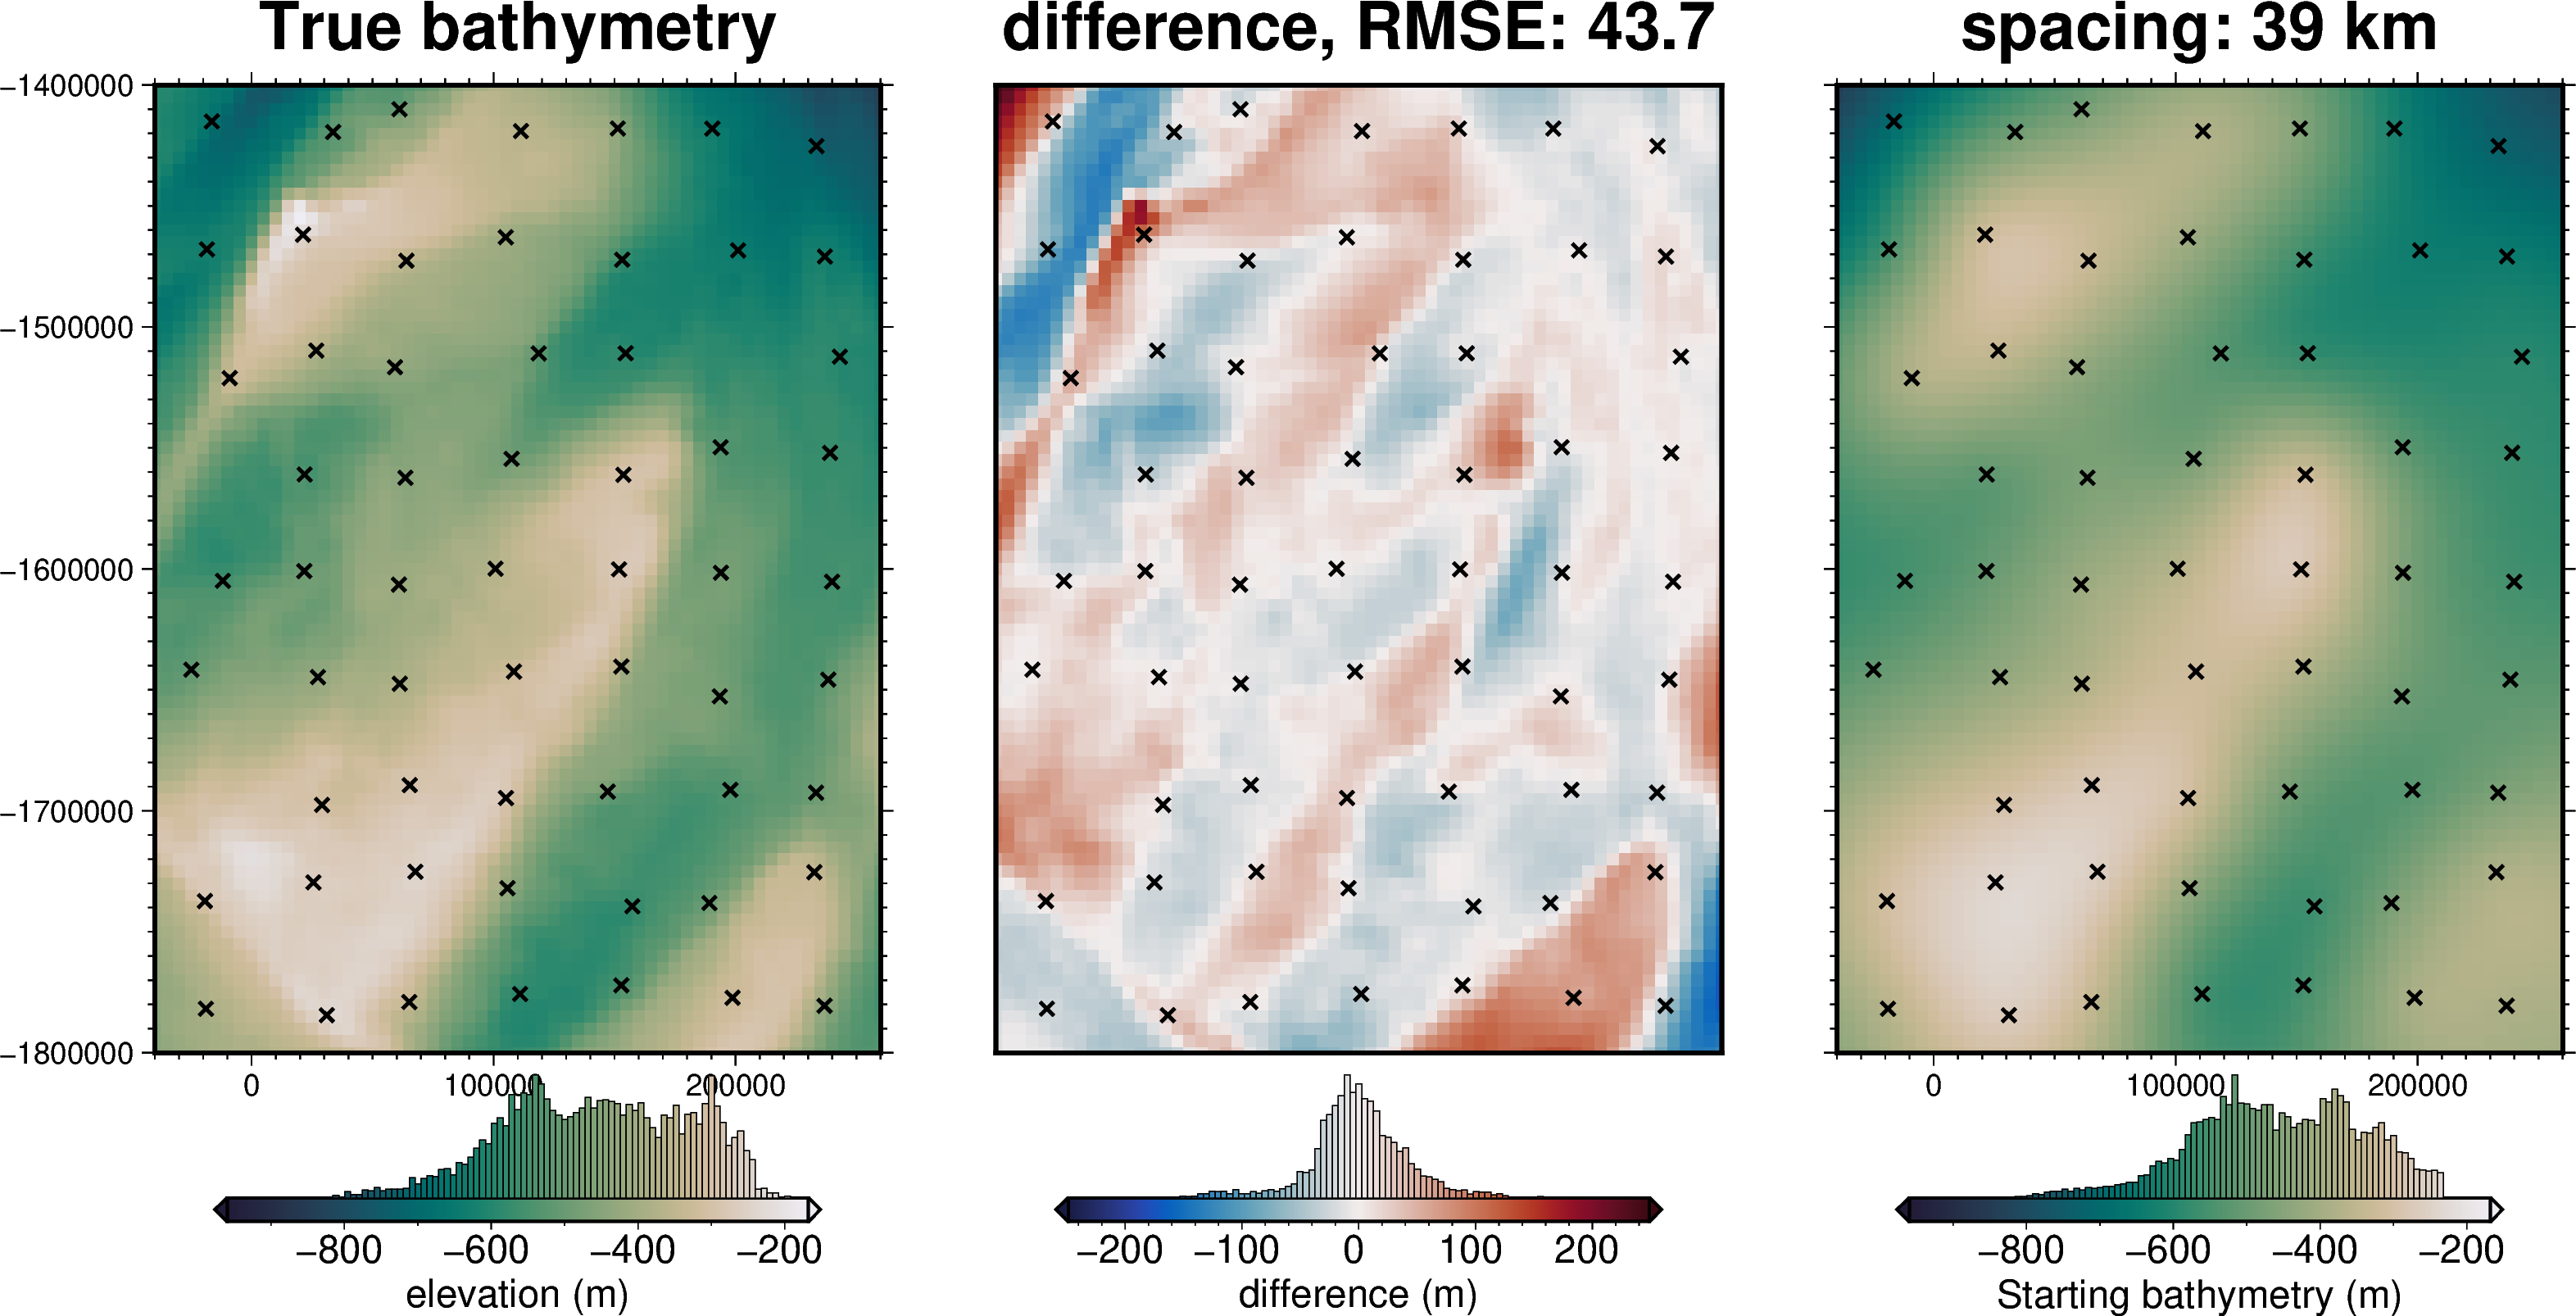

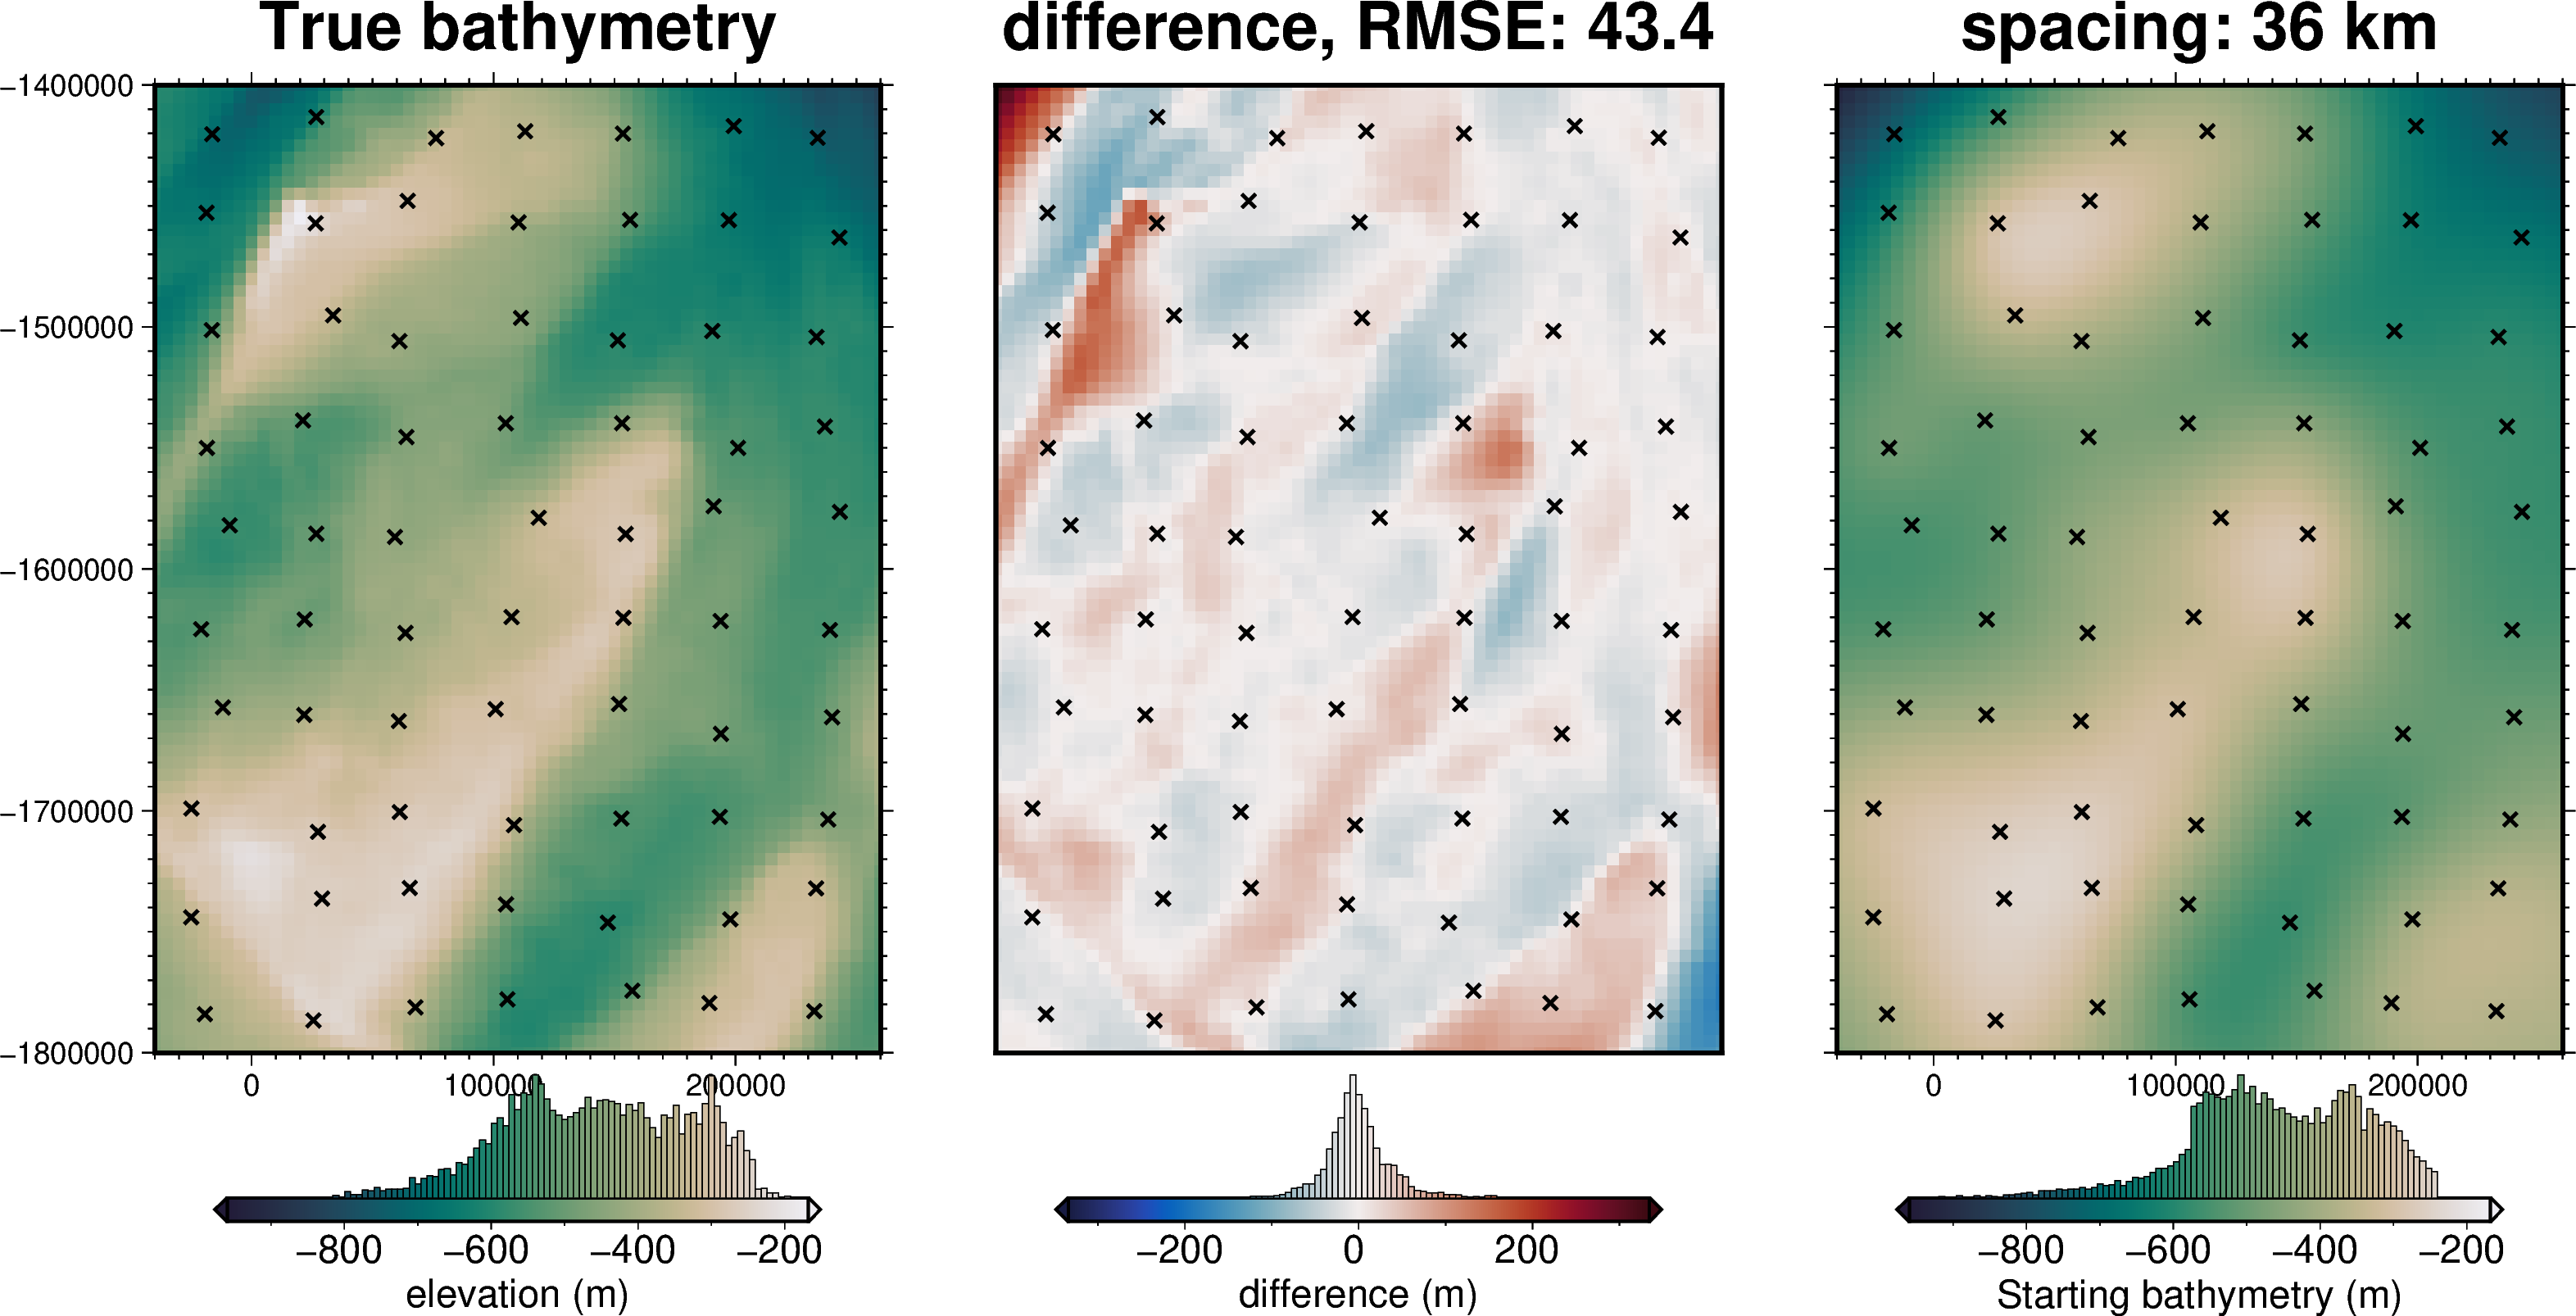

In [ ]:
lims = polar_utils.get_min_max(bathymetry)

unique_constraint_numbers_df = sampled_params_df.drop_duplicates(
    subset=["constraint_numbers"]
)

for _i, row in unique_constraint_numbers_df.iterrows():
    starting_bathymetry = xr.load_dataarray(row.starting_bathymetry_fname)
    constraint_points = pd.read_csv(row.constraint_points_fname)

    starting_bathymetry_inside = starting_bathymetry.sel(
        easting=slice(inversion_region[0], inversion_region[1]),
        northing=slice(inversion_region[2], inversion_region[3]),
    )
    bathymetry_inside = bathymetry.sel(
        easting=slice(inversion_region[0], inversion_region[1]),
        northing=slice(inversion_region[2], inversion_region[3]),
    )

    # compare starting and actual bathymetry grids
    fig = maps.plot_grd(
        bathymetry_inside,
        fig_height=10,
        cmap="rain",
        reverse_cpt=True,
        cpt_lims=lims,
        title="True bathymetry",
        cbar_label="elevation (m)",
        cbar_font="18p,Helvetica,black",
        frame=["nSWe", "xaf10000", "yaf10000"],
        hist=True,
        cbar_yoffset=1.5,
        points=constraint_points,
        points_style="x.2c",
    )

    dif = bathymetry_inside - starting_bathymetry_inside
    fig = maps.plot_grd(
        dif,
        fig_height=10,
        cmap="balance+h0",
        cpt_lims=(-vd.maxabs(dif), vd.maxabs(dif)),
        title=f"difference, RMSE: {round(utils.rmse(dif),1)}",
        cbar_label="difference (m)",
        cbar_font="18p,Helvetica,black",
        hist=True,
        cbar_yoffset=1.5,
        grd2_cpt=True,
        fig=fig,
        origin_shift="xshift",
        xshift_amount=1.1,
        points=constraint_points,
        points_style="x.2c",
    )

    # plot the starting bathymetry
    fig = maps.plot_grd(
        starting_bathymetry_inside,
        fig_height=10,
        cmap="rain",
        reverse_cpt=True,
        cpt_lims=lims,
        title=f"spacing: {round(row.constraint_spacing)} km",
        cbar_label="Starting bathymetry (m)",
        cbar_font="18p,Helvetica,black",
        frame=["nSwe", "xaf10000", "yaf10000"],
        hist=True,
        cbar_yoffset=1.5,
        fig=fig,
        origin_shift="xshift",
        xshift_amount=1.1,
        points=constraint_points,
        points_style="x.2c",
    )
    fig.show()

# Create observed gravity
* rescale regional field


In [125]:
logging.getLogger().setLevel(logging.WARNING)

sampled_params_df["grav_df_fname"] = pd.Series()

grav_grid = original_grav_df.set_index(["northing", "easting"]).to_xarray()

for i, row in tqdm(sampled_params_df.iterrows(), total=len(sampled_params_df)):
    # set file names
    grav_df_fname = f"{ensemble_path}grav_df_{i}.csv"

    # re-scale the regional gravity
    regional_grav = utils.normalize_xarray(
        grav_grid.basement_grav_normalized,
        low=0,
        high=row.regional_strengths,
    ).rename("basement_grav")
    regional_grav -= regional_grav.mean()

    # add to new dataframe
    grav_df = copy.deepcopy(original_grav_df.drop(columns=["basement_grav_normalized"]))
    grav_df["basement_grav"] = (
        vd.grid_to_table(regional_grav).reset_index().basement_grav
    )

    # add basement and bathymetry forward gravities together to make observed gravity
    grav_df["gravity_anomaly"] = grav_df.bathymetry_grav + grav_df.basement_grav

    # save to files
    grav_df.to_csv(grav_df_fname, index=False)

    # add to dataframe
    sampled_params_df.loc[i, "grav_df_fname"] = grav_df_fname

sampled_params_df.head()

  0%|          | 0/64 [00:00<?, ?it/s]

constraint_numbers  regional_strengths  \
0                   4                0.00   
1                   4                7.14   
2                   4               14.29   
3                   4               21.43   
4                   4               28.57   

                             constraint_points_fname  \
0  ../../results/08_constraint_spacing_vs_regiona...   
1  ../../results/08_constraint_spacing_vs_regiona...   
2  ../../results/08_constraint_spacing_vs_regiona...   
3  ../../results/08_constraint_spacing_vs_regiona...   
4  ../../results/08_constraint_spacing_vs_regiona...   

   constraints_starting_rmse  \
0                   0.034142   
1                   0.034142   
2                   0.034142   
3                   0.034142   
4                   0.034142   

                           starting_bathymetry_fname  constraint_spacing  \
0  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
1  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
2  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
3  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
4  ../../results/08_constraint_spacing_vs_regiona...          141.418734   

                               starting_prisms_fname  \
0  ../../results/08_constraint_spacing_vs_regiona...   
1  ../../results/08_constraint_spacing_vs_regiona...   
2  ../../results/08_constraint_spacing_vs_regiona...   
3  ../../results/08_constraint_spacing_vs_regiona...   
4  ../../results/08_constraint_spacing_vs_regiona...   

   starting_bathymetry_damping  number_of_constraints  \
0                 1.000000e-20                      4   
1                 1.000000e-20                      4   
2                 1.000000e-20                      4   
3                 1.000000e-20                      4   
4                 1.000000e-20                      4   

   constraints_per_10000sq_km  starting_bathymetry_mae  \
0                    0.333333               516.567897   
1                    0.333333               516.567897   
2                    0.333333               516.567897   
3                    0.333333               516.567897   
4                    0.333333               516.567897   

   starting_bathymetry_rmse                                      grav_df_fname  
0                682.098767  ../../results/08_constraint_spacing_vs_regiona...  
1                682.098767  ../../results/08_constraint_spacing_vs_regiona...  
2                682.098767  ../../results/08_constraint_spacing_vs_regiona...  
3                682.098767  ../../results/08_constraint_spacing_vs_regiona...  
4                682.098767  ../../results/08_constraint_spacing_vs_regiona...

In [126]:
sampled_params_df.to_csv(ensemble_fname, index=False)

In [127]:
sampled_params_df = pd.read_csv(ensemble_fname)
sampled_params_df.head()

constraint_numbers  regional_strengths  \
0                   4                0.00   
1                   4                7.14   
2                   4               14.29   
3                   4               21.43   
4                   4               28.57   

                             constraint_points_fname  \
0  ../../results/08_constraint_spacing_vs_regiona...   
1  ../../results/08_constraint_spacing_vs_regiona...   
2  ../../results/08_constraint_spacing_vs_regiona...   
3  ../../results/08_constraint_spacing_vs_regiona...   
4  ../../results/08_constraint_spacing_vs_regiona...   

   constraints_starting_rmse  \
0                   0.034142   
1                   0.034142   
2                   0.034142   
3                   0.034142   
4                   0.034142   

                           starting_bathymetry_fname  constraint_spacing  \
0  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
1  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
2  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
3  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
4  ../../results/08_constraint_spacing_vs_regiona...          141.418734   

                               starting_prisms_fname  \
0  ../../results/08_constraint_spacing_vs_regiona...   
1  ../../results/08_constraint_spacing_vs_regiona...   
2  ../../results/08_constraint_spacing_vs_regiona...   
3  ../../results/08_constraint_spacing_vs_regiona...   
4  ../../results/08_constraint_spacing_vs_regiona...   

   starting_bathymetry_damping  number_of_constraints  \
0                 1.000000e-20                      4   
1                 1.000000e-20                      4   
2                 1.000000e-20                      4   
3                 1.000000e-20                      4   
4                 1.000000e-20                      4   

   constraints_per_10000sq_km  starting_bathymetry_mae  \
0                    0.333333               516.567897   
1                    0.333333               516.567897   
2                    0.333333               516.567897   
3                    0.333333               516.567897   
4                    0.333333               516.567897   

   starting_bathymetry_rmse                                      grav_df_fname  
0                682.098767  ../../results/08_constraint_spacing_vs_regiona...  
1                682.098767  ../../results/08_constraint_spacing_vs_regiona...  
2                682.098767  ../../results/08_constraint_spacing_vs_regiona...  
3                682.098767  ../../results/08_constraint_spacing_vs_regiona...  
4                682.098767  ../../results/08_constraint_spacing_vs_regiona...

# Calculate starting gravity and regional

In [128]:
def regional_comparison(df):
    # grid the results
    grav_grid = df.set_index(["northing", "easting"]).to_xarray()

    # compare with true regional
    _ = polar_utils.grd_compare(
        grav_grid.basement_grav,
        grav_grid.reg,
        plot=True,
        grid1_name="True regional misfit",
        grid2_name="Regional misfit",
        hist=True,
        cbar_yoffset=1,
        inset=False,
        verbose="q",
        title="difference",
        grounding_line=False,
        points=constraint_points.rename(columns={"easting": "x", "northing": "y"}),
        points_style="x.3c",
    )
    # compare with true residual
    # _ = polar_utils.grd_compare(
    #     grav_grid.true_res,
    #     grav_grid.res,
    #     plot=True,
    #     grid1_name="True residual misfit",
    #     grid2_name="Residual misfit",
    #     cmap="balance+h0",
    #     hist=True,
    #     cbar_yoffset=1,
    #     inset=False,
    #     verbose="q",
    #     title="difference",
    #     grounding_line=False,
    #     points=constraint_points.rename(columns={"easting": "x", "northing": "y"}),
    #     points_style="x.3c",
    # )

In [129]:
logging.getLogger().setLevel(logging.WARNING)

sampled_params_df["reg_eqs_damping"] = pd.Series()
sampled_params_df["reg_eqs_depth"] = pd.Series()
sampled_params_df["reg_eqs_score"] = pd.Series()

# estimate regional
regional_grav_kwargs = dict(
    method="constraints",
    grid_method="eq_sources",
    cv=True,
    cv_kwargs=dict(
        n_trials=50,  # CHANGE TO 50
        damping_limits=(1e-30, 10),
        depth_limits=(10, 500e3),
        progressbar=False,
        fname="tmp/08_regional_sep",
    ),
    # depth="default",
    # damping=None, # CHANGE TO LIMITS
    block_size=None,
)

for i, row in tqdm(sampled_params_df.iterrows(), total=len(sampled_params_df)):
    # load data
    starting_prisms = xr.load_dataset(row.starting_prisms_fname)
    grav_df = pd.read_csv(row.grav_df_fname)
    constraint_points = pd.read_csv(row.constraint_points_fname)

    # calculate the starting gravity
    grav_df["starting_gravity"] = starting_prisms.prism_layer.gravity(
        coordinates=(
            grav_df.easting,
            grav_df.northing,
            grav_df.upward,
        ),
        field="g_z",
        progressbar=False,
    )

    # calculate the true residual misfit
    grav_df["true_res"] = grav_df.bathymetry_grav - grav_df.starting_gravity

    # temporarily set some kwargs
    temp_reg_kwargs = copy.deepcopy(regional_grav_kwargs)
    temp_reg_kwargs["constraints_df"] = constraint_points
    temp_reg_kwargs["cv_kwargs"]["fname"] = f"tmp/08_regional_sep_{i}"
    # temp_reg_kwargs["cv_kwargs"]["plot"]=True
    temp_reg_kwargs["cv_kwargs"]["progressbar"] = True

    grav_df = regional.regional_separation(
        grav_df=grav_df,
        **temp_reg_kwargs,
    )
    # regional_comparison(grav_df)

    # re-load the study from the saved pickle file
    with pathlib.Path(f"tmp/08_regional_sep_{i}.pickle").open("rb") as f:
        reg_study = pickle.load(f)
    reg_eq_damping = min(reg_study.best_trials, key=lambda t: t.values[0]).params[
        "damping"
    ]
    reg_eq_depth = min(reg_study.best_trials, key=lambda t: t.values[0]).params["depth"]
    reg_score = reg_study.best_trial.value

    # add to dataframe
    sampled_params_df.loc[i, "reg_eqs_damping"] = reg_eq_damping
    sampled_params_df.loc[i, "reg_eqs_depth"] = reg_eq_depth
    sampled_params_df.loc[i, "reg_eqs_score"] = reg_score

    # resave gravity dataframe
    grav_df.to_csv(row.grav_df_fname, index=False)

sampled_params_df.head()

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

constraint_numbers  regional_strengths  \
0                   4                0.00   
1                   4                7.14   
2                   4               14.29   
3                   4               21.43   
4                   4               28.57   

                             constraint_points_fname  \
0  ../../results/08_constraint_spacing_vs_regiona...   
1  ../../results/08_constraint_spacing_vs_regiona...   
2  ../../results/08_constraint_spacing_vs_regiona...   
3  ../../results/08_constraint_spacing_vs_regiona...   
4  ../../results/08_constraint_spacing_vs_regiona...   

   constraints_starting_rmse  \
0                   0.034142   
1                   0.034142   
2                   0.034142   
3                   0.034142   
4                   0.034142   

                           starting_bathymetry_fname  constraint_spacing  \
0  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
1  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
2  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
3  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
4  ../../results/08_constraint_spacing_vs_regiona...          141.418734   

                               starting_prisms_fname  \
0  ../../results/08_constraint_spacing_vs_regiona...   
1  ../../results/08_constraint_spacing_vs_regiona...   
2  ../../results/08_constraint_spacing_vs_regiona...   
3  ../../results/08_constraint_spacing_vs_regiona...   
4  ../../results/08_constraint_spacing_vs_regiona...   

   starting_bathymetry_damping  number_of_constraints  \
0                 1.000000e-20                      4   
1                 1.000000e-20                      4   
2                 1.000000e-20                      4   
3                 1.000000e-20                      4   
4                 1.000000e-20                      4   

   constraints_per_10000sq_km  starting_bathymetry_mae  \
0                    0.333333               516.567897   
1                    0.333333               516.567897   
2                    0.333333               516.567897   
3                    0.333333               516.567897   
4                    0.333333               516.567897   

   starting_bathymetry_rmse  \
0                682.098767   
1                682.098767   
2                682.098767   
3                682.098767   
4                682.098767   

                                       grav_df_fname reg_eqs_damping  \
0  ../../results/08_constraint_spacing_vs_regiona...             0.0   
1  ../../results/08_constraint_spacing_vs_regiona...        0.000001   
2  ../../results/08_constraint_spacing_vs_regiona...        0.000001   
3  ../../results/08_constraint_spacing_vs_regiona...        0.000001   
4  ../../results/08_constraint_spacing_vs_regiona...        0.000001   

  reg_eqs_depth reg_eqs_score  
0  22833.209546     -0.223074  
1          10.0     -0.431385  
2          10.0     -0.415831  
3          10.0     -0.410769  
4          10.0      -0.40826

In [ ]:
grav_grids = []
for _i, row in sampled_params_df.iterrows():
    grav_df = pd.read_csv(row.grav_df_fname)
    grav_grids.append(grav_df.set_index(["northing", "easting"]).to_xarray())

cpt_lims = polar_utils.get_combined_min_max(
    [g.basement_grav - g.reg for g in grav_grids],
    robust=True,
)

for i, row in sampled_params_df.iterrows():
    grav_df = pd.read_csv(row.grav_df_fname)
    constraint_points = pd.read_csv(row.constraint_points_fname)

    g = grav_df.set_index(["northing", "easting"]).to_xarray()
    if i == 0:
        fig = None
        origin_shift = "initialize"
        xshift_amount = 0
    elif i % 8 == 0:
        origin_shift = "both_shift"
        xshift_amount = -7.7
    else:
        origin_shift = "xshift"
        xshift_amount = 1.1
    # if i % 4 == 0:
    dif = g.basement_grav - g.reg

    rmse = utils.rmse(dif)
    rms = utils.rmse(g.basement_grav)

    fig = maps.plot_grd(
        dif,
        region=inversion_region,
        fig_height=10,
        fig=fig,
        origin_shift=origin_shift,
        title=f"Avg Reg: {round(rms,2)} mGal",
        cmap="balance+h0",
        cpt_lims=cpt_lims,
        hist=True,
        cbar_font="18p,Helvetica,black",
        cbar_label=f"RMS: {round(rmse,2)} (mGal)",
        points=constraint_points,
        points_style="p.1c",
        xshift_amount=xshift_amount,
    )

fig.show()

In [131]:
sampled_params_df.to_csv(ensemble_fname, index=False)

In [132]:
sampled_params_df = pd.read_csv(ensemble_fname)
sampled_params_df.head()

constraint_numbers  regional_strengths  \
0                   4                0.00   
1                   4                7.14   
2                   4               14.29   
3                   4               21.43   
4                   4               28.57   

                             constraint_points_fname  \
0  ../../results/08_constraint_spacing_vs_regiona...   
1  ../../results/08_constraint_spacing_vs_regiona...   
2  ../../results/08_constraint_spacing_vs_regiona...   
3  ../../results/08_constraint_spacing_vs_regiona...   
4  ../../results/08_constraint_spacing_vs_regiona...   

   constraints_starting_rmse  \
0                   0.034142   
1                   0.034142   
2                   0.034142   
3                   0.034142   
4                   0.034142   

                           starting_bathymetry_fname  constraint_spacing  \
0  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
1  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
2  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
3  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
4  ../../results/08_constraint_spacing_vs_regiona...          141.418734   

                               starting_prisms_fname  \
0  ../../results/08_constraint_spacing_vs_regiona...   
1  ../../results/08_constraint_spacing_vs_regiona...   
2  ../../results/08_constraint_spacing_vs_regiona...   
3  ../../results/08_constraint_spacing_vs_regiona...   
4  ../../results/08_constraint_spacing_vs_regiona...   

   starting_bathymetry_damping  number_of_constraints  \
0                 1.000000e-20                      4   
1                 1.000000e-20                      4   
2                 1.000000e-20                      4   
3                 1.000000e-20                      4   
4                 1.000000e-20                      4   

   constraints_per_10000sq_km  starting_bathymetry_mae  \
0                    0.333333               516.567897   
1                    0.333333               516.567897   
2                    0.333333               516.567897   
3                    0.333333               516.567897   
4                    0.333333               516.567897   

   starting_bathymetry_rmse  \
0                682.098767   
1                682.098767   
2                682.098767   
3                682.098767   
4                682.098767   

                                       grav_df_fname  reg_eqs_damping  \
0  ../../results/08_constraint_spacing_vs_regiona...     1.511691e-10   
1  ../../results/08_constraint_spacing_vs_regiona...     8.145916e-07   
2  ../../results/08_constraint_spacing_vs_regiona...     8.145916e-07   
3  ../../results/08_constraint_spacing_vs_regiona...     8.145916e-07   
4  ../../results/08_constraint_spacing_vs_regiona...     8.145916e-07   

   reg_eqs_depth  reg_eqs_score  
0   22833.209546      -0.223074  
1      10.000000      -0.431385  
2      10.000000      -0.415831  
3      10.000000      -0.410769  
4      10.000000      -0.408260

<!-- # Add noise to gravity data -->

# Damping Cross Validation

In [133]:
logging.getLogger().setLevel(logging.WARNING)

sampled_params_df["damping_cv_results_fname"] = pd.Series()

for i, row in tqdm(sampled_params_df.iterrows(), total=len(sampled_params_df)):
    # load data
    starting_prisms = xr.load_dataset(row.starting_prisms_fname)
    grav_df = pd.read_csv(row.grav_df_fname)

    # set kwargs to pass to the inversion
    kwargs = {
        # set stopping criteria
        "max_iterations": 200,  #### CHANGE THIS TO 200
        "l2_norm_tolerance": 0.2**0.5,  # square root of the gravity noise
        "delta_l2_norm_tolerance": 1.008,
    }

    # set results file name
    damping_cv_results_fname = f"{ensemble_path}_damping_cv_{i}"

    # run the inversion workflow, including a cross validation for the damping parameter
    _ = inversion.run_inversion_workflow(
        grav_df=grav_df,
        starting_prisms=starting_prisms,
        # for creating test/train splits
        grav_spacing=spacing,
        inversion_region=inversion_region,
        run_damping_cv=True,
        damping_limits=(0.001, 0.1),
        damping_cv_trials=8,  ### CHANGE THIS TO 8
        # plot_cv=True,
        fname=damping_cv_results_fname,
        **kwargs,
    )

    # add results file name
    sampled_params_df.loc[i, "damping_cv_results_fname"] = damping_cv_results_fname

sampled_params_df.head()

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

  0%|          | 0/8 [00:00<?, ?it/s]

constraint_numbers  regional_strengths  \
0                   4                0.00   
1                   4                7.14   
2                   4               14.29   
3                   4               21.43   
4                   4               28.57   

                             constraint_points_fname  \
0  ../../results/08_constraint_spacing_vs_regiona...   
1  ../../results/08_constraint_spacing_vs_regiona...   
2  ../../results/08_constraint_spacing_vs_regiona...   
3  ../../results/08_constraint_spacing_vs_regiona...   
4  ../../results/08_constraint_spacing_vs_regiona...   

   constraints_starting_rmse  \
0                   0.034142   
1                   0.034142   
2                   0.034142   
3                   0.034142   
4                   0.034142   

                           starting_bathymetry_fname  constraint_spacing  \
0  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
1  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
2  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
3  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
4  ../../results/08_constraint_spacing_vs_regiona...          141.418734   

                               starting_prisms_fname  \
0  ../../results/08_constraint_spacing_vs_regiona...   
1  ../../results/08_constraint_spacing_vs_regiona...   
2  ../../results/08_constraint_spacing_vs_regiona...   
3  ../../results/08_constraint_spacing_vs_regiona...   
4  ../../results/08_constraint_spacing_vs_regiona...   

   starting_bathymetry_damping  number_of_constraints  \
0                 1.000000e-20                      4   
1                 1.000000e-20                      4   
2                 1.000000e-20                      4   
3                 1.000000e-20                      4   
4                 1.000000e-20                      4   

   constraints_per_10000sq_km  starting_bathymetry_mae  \
0                    0.333333               516.567897   
1                    0.333333               516.567897   
2                    0.333333               516.567897   
3                    0.333333               516.567897   
4                    0.333333               516.567897   

   starting_bathymetry_rmse  \
0                682.098767   
1                682.098767   
2                682.098767   
3                682.098767   
4                682.098767   

                                       grav_df_fname  reg_eqs_damping  \
0  ../../results/08_constraint_spacing_vs_regiona...     1.511691e-10   
1  ../../results/08_constraint_spacing_vs_regiona...     8.145916e-07   
2  ../../results/08_constraint_spacing_vs_regiona...     8.145916e-07   
3  ../../results/08_constraint_spacing_vs_regiona...     8.145916e-07   
4  ../../results/08_constraint_spacing_vs_regiona...     8.145916e-07   

   reg_eqs_depth  reg_eqs_score  \
0   22833.209546      -0.223074   
1      10.000000      -0.431385   
2      10.000000      -0.415831   
3      10.000000      -0.410769   
4      10.000000      -0.408260   

                            damping_cv_results_fname  
0  ../../results/08_constraint_spacing_vs_regiona...  
1  ../../results/08_constraint_spacing_vs_regiona...  
2  ../../results/08_constraint_spacing_vs_regiona...  
3  ../../results/08_constraint_spacing_vs_regiona...  
4  ../../results/08_constraint_spacing_vs_regiona...

In [134]:
sampled_params_df.to_csv(ensemble_fname, index=False)

In [135]:
sampled_params_df = pd.read_csv(ensemble_fname)
sampled_params_df.head()

constraint_numbers  regional_strengths  \
0                   4                0.00   
1                   4                7.14   
2                   4               14.29   
3                   4               21.43   
4                   4               28.57   

                             constraint_points_fname  \
0  ../../results/08_constraint_spacing_vs_regiona...   
1  ../../results/08_constraint_spacing_vs_regiona...   
2  ../../results/08_constraint_spacing_vs_regiona...   
3  ../../results/08_constraint_spacing_vs_regiona...   
4  ../../results/08_constraint_spacing_vs_regiona...   

   constraints_starting_rmse  \
0                   0.034142   
1                   0.034142   
2                   0.034142   
3                   0.034142   
4                   0.034142   

                           starting_bathymetry_fname  constraint_spacing  \
0  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
1  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
2  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
3  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
4  ../../results/08_constraint_spacing_vs_regiona...          141.418734   

                               starting_prisms_fname  \
0  ../../results/08_constraint_spacing_vs_regiona...   
1  ../../results/08_constraint_spacing_vs_regiona...   
2  ../../results/08_constraint_spacing_vs_regiona...   
3  ../../results/08_constraint_spacing_vs_regiona...   
4  ../../results/08_constraint_spacing_vs_regiona...   

   starting_bathymetry_damping  number_of_constraints  \
0                 1.000000e-20                      4   
1                 1.000000e-20                      4   
2                 1.000000e-20                      4   
3                 1.000000e-20                      4   
4                 1.000000e-20                      4   

   constraints_per_10000sq_km  starting_bathymetry_mae  \
0                    0.333333               516.567897   
1                    0.333333               516.567897   
2                    0.333333               516.567897   
3                    0.333333               516.567897   
4                    0.333333               516.567897   

   starting_bathymetry_rmse  \
0                682.098767   
1                682.098767   
2                682.098767   
3                682.098767   
4                682.098767   

                                       grav_df_fname  reg_eqs_damping  \
0  ../../results/08_constraint_spacing_vs_regiona...     1.511691e-10   
1  ../../results/08_constraint_spacing_vs_regiona...     8.145916e-07   
2  ../../results/08_constraint_spacing_vs_regiona...     8.145916e-07   
3  ../../results/08_constraint_spacing_vs_regiona...     8.145916e-07   
4  ../../results/08_constraint_spacing_vs_regiona...     8.145916e-07   

   reg_eqs_depth  reg_eqs_score  \
0   22833.209546      -0.223074   
1      10.000000      -0.431385   
2      10.000000      -0.415831   
3      10.000000      -0.410769   
4      10.000000      -0.408260   

                            damping_cv_results_fname  
0  ../../results/08_constraint_spacing_vs_regiona...  
1  ../../results/08_constraint_spacing_vs_regiona...  
2  ../../results/08_constraint_spacing_vs_regiona...  
3  ../../results/08_constraint_spacing_vs_regiona...  
4  ../../results/08_constraint_spacing_vs_regiona...

In [ ]:
sampled_params_df["best_damping"] = pd.Series()
sampled_params_df["constraints_rmse"] = pd.Series()
sampled_params_df["inversion_rmse"] = pd.Series()
sampled_params_df["inversion_mae"] = pd.Series()
sampled_params_df["inverted_bathymetry_fname"] = pd.Series()

for _i, row in sampled_params_df.iterrows():
    constraint_points = pd.read_csv(row.constraint_points_fname)

    print(
        "constraint number:",
        row.constraint_numbers,
        "reg strength:",
        row.regional_strengths,
    )
    # load saved inversion results
    with pathlib.Path(f"{row.damping_cv_results_fname}_results.pickle").open("rb") as f:
        results = pickle.load(f)

    # load study
    with pathlib.Path(f"{row.damping_cv_results_fname}_damping_cv_study.pickle").open(
        "rb"
    ) as f:
        study = pickle.load(f)

    # collect the results
    topo_results, grav_results, parameters, elapsed_time = results
    final_bathymetry = topo_results.set_index(["northing", "easting"]).to_xarray().topo

    # add best damping to dataframe
    sampled_params_df.loc[i, "best_damping"] = parameters.get("Solver damping")

    # if row.regional_strengths == 0:
    #     plotting.plot_convergence(
    #         grav_results,
    #         params=parameters,
    #     )

    #     plotting.plot_cv_scores(
    #             study.trials_dataframe().value.values,
    #             study.trials_dataframe().params_damping.values,
    #             param_name="Damping",
    #             logx=True,
    #             logy=True,
    #         )

    #     plotting.plot_inversion_results(
    #         grav_results,
    #         topo_results,
    #         parameters,
    #         inversion_region,
    #         iters_to_plot=2,
    #         # plot_iter_results=False,
    #         plot_topo_results=False,
    #         plot_grav_results=False,
    #     )

    #     _ = polar_utils.grd_compare(
    #         bathymetry,
    #         final_bathymetry,
    #         region=inversion_region,
    #         plot=True,
    #         grid1_name="True topography",
    #         grid2_name="Inverted topography",
    #         robust=True,
    #         hist=True,
    #         inset=False,
    #         verbose="q",
    #         title="difference",
    #         grounding_line=False,
    #         reverse_cpt=True,
    #         cmap="rain",
    #         points=constraint_points.rename(columns={"easting": "x", "northing": "y"}),
    #         points_style="x.2c",
    #     )

    # sample the inverted topography at the constraint points
    constraint_points = utils.sample_grids(
        constraint_points,
        final_bathymetry,
        "inverted_damping_cv_bathymetry",
        coord_names=("easting", "northing"),
    )
    constraints_rmse = utils.rmse(
        constraint_points.true_upward - constraint_points.inverted_damping_cv_bathymetry
    )
    bathymetry_inner = bathymetry.sel(
        easting=slice(inversion_region[0], inversion_region[1]),
        northing=slice(inversion_region[2], inversion_region[3]),
    )
    final_bathymetry_inner = final_bathymetry.sel(
        easting=slice(inversion_region[0], inversion_region[1]),
        northing=slice(inversion_region[2], inversion_region[3]),
    )
    inversion_rmse = utils.rmse(bathymetry_inner - final_bathymetry_inner)
    inversion_mae = float(np.mean(np.abs(bathymetry_inner - final_bathymetry_inner)))

    # save final topography to file
    inverted_bathymetry_fname = f"{ensemble_path}inverted_damping_cv_bathymetry_{i}.nc"
    final_bathymetry.to_netcdf(inverted_bathymetry_fname)

    # add to dataframe
    sampled_params_df.loc[i, "inverted_bathymetry_fname"] = inverted_bathymetry_fname
    sampled_params_df.loc[i, "constraints_rmse"] = constraints_rmse
    sampled_params_df.loc[i, "inversion_rmse"] = inversion_rmse
    sampled_params_df.loc[i, "inversion_mae"] = inversion_mae

sampled_params_df.head()

constraint number: 4 reg strength: 0.0
constraint number: 4 reg strength: 7.14
constraint number: 4 reg strength: 14.29
constraint number: 4 reg strength: 21.43
constraint number: 4 reg strength: 28.57
constraint number: 4 reg strength: 35.71
constraint number: 4 reg strength: 42.86
constraint number: 4 reg strength: 50.0
constraint number: 13 reg strength: 0.0
constraint number: 13 reg strength: 7.14
constraint number: 13 reg strength: 14.29
constraint number: 13 reg strength: 21.43
constraint number: 13 reg strength: 28.57
constraint number: 13 reg strength: 35.71
constraint number: 13 reg strength: 42.86
constraint number: 13 reg strength: 50.0
constraint number: 22 reg strength: 0.0
constraint number: 22 reg strength: 7.14
constraint number: 22 reg strength: 14.29
constraint number: 22 reg strength: 21.43
constraint number: 22 reg strength: 28.57
constraint number: 22 reg strength: 35.71
constraint number: 22 reg strength: 42.86
constraint number: 22 reg strength: 50.0
constraint n

constraint_numbers  regional_strengths  \
0                   4                0.00   
1                   4                7.14   
2                   4               14.29   
3                   4               21.43   
4                   4               28.57   

                             constraint_points_fname  \
0  ../../results/08_constraint_spacing_vs_regiona...   
1  ../../results/08_constraint_spacing_vs_regiona...   
2  ../../results/08_constraint_spacing_vs_regiona...   
3  ../../results/08_constraint_spacing_vs_regiona...   
4  ../../results/08_constraint_spacing_vs_regiona...   

   constraints_starting_rmse  \
0                   0.034142   
1                   0.034142   
2                   0.034142   
3                   0.034142   
4                   0.034142   

                           starting_bathymetry_fname  constraint_spacing  \
0  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
1  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
2  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
3  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
4  ../../results/08_constraint_spacing_vs_regiona...          141.418734   

                               starting_prisms_fname  \
0  ../../results/08_constraint_spacing_vs_regiona...   
1  ../../results/08_constraint_spacing_vs_regiona...   
2  ../../results/08_constraint_spacing_vs_regiona...   
3  ../../results/08_constraint_spacing_vs_regiona...   
4  ../../results/08_constraint_spacing_vs_regiona...   

   starting_bathymetry_damping  number_of_constraints  \
0                 1.000000e-20                      4   
1                 1.000000e-20                      4   
2                 1.000000e-20                      4   
3                 1.000000e-20                      4   
4                 1.000000e-20                      4   

   constraints_per_10000sq_km  ...  \
0                    0.333333  ...   
1                    0.333333  ...   
2                    0.333333  ...   
3                    0.333333  ...   
4                    0.333333  ...   

                                       grav_df_fname  reg_eqs_damping  \
0  ../../results/08_constraint_spacing_vs_regiona...     1.511691e-10   
1  ../../results/08_constraint_spacing_vs_regiona...     8.145916e-07   
2  ../../results/08_constraint_spacing_vs_regiona...     8.145916e-07   
3  ../../results/08_constraint_spacing_vs_regiona...     8.145916e-07   
4  ../../results/08_constraint_spacing_vs_regiona...     8.145916e-07   

  reg_eqs_depth  reg_eqs_score  \
0  22833.209546      -0.223074   
1     10.000000      -0.431385   
2     10.000000      -0.415831   
3     10.000000      -0.410769   
4     10.000000      -0.408260   

                            damping_cv_results_fname  best_damping  \
0  ../../results/08_constraint_spacing_vs_regiona...      0.049902   
1  ../../results/08_constraint_spacing_vs_regiona...      0.049965   
2  ../../results/08_constraint_spacing_vs_regiona...      0.040882   
3  ../../results/08_constraint_spacing_vs_regiona...      0.049754   
4  ../../results/08_constraint_spacing_vs_regiona...      0.049733   

  constraints_rmse inversion_rmse inversion_mae  \
0         4.814297      233.90984     27.645629   
1        37.991893     231.898326     45.563827   
2        75.694488     233.595605      67.54358   
3       113.413176     239.033413     90.065512   
4       151.206439     248.132528    113.387467   

                           inverted_bathymetry_fname  
0  ../../results/08_constraint_spacing_vs_regiona...  
1  ../../results/08_constraint_spacing_vs_regiona...  
2  ../../results/08_constraint_spacing_vs_regiona...  
3  ../../results/08_constraint_spacing_vs_regiona...  
4  ../../results/08_constraint_spacing_vs_regiona...  

[5 rows x 22 columns]

In [137]:
sampled_params_df.to_csv(ensemble_fname, index=False)

In [138]:
ensemble_fname[0:-4]

'../../results/08_constraint_spacing_vs_regional_strength_ensemble_linear'

In [139]:
# sampled_params_df.to_csv(f"{ensemble_fname[0:-4]}_backup.csv", index=False)

In [140]:
sampled_params_df = pd.read_csv(ensemble_fname)
sampled_params_df.head()

constraint_numbers  regional_strengths  \
0                   4                0.00   
1                   4                7.14   
2                   4               14.29   
3                   4               21.43   
4                   4               28.57   

                             constraint_points_fname  \
0  ../../results/08_constraint_spacing_vs_regiona...   
1  ../../results/08_constraint_spacing_vs_regiona...   
2  ../../results/08_constraint_spacing_vs_regiona...   
3  ../../results/08_constraint_spacing_vs_regiona...   
4  ../../results/08_constraint_spacing_vs_regiona...   

   constraints_starting_rmse  \
0                   0.034142   
1                   0.034142   
2                   0.034142   
3                   0.034142   
4                   0.034142   

                           starting_bathymetry_fname  constraint_spacing  \
0  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
1  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
2  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
3  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
4  ../../results/08_constraint_spacing_vs_regiona...          141.418734   

                               starting_prisms_fname  \
0  ../../results/08_constraint_spacing_vs_regiona...   
1  ../../results/08_constraint_spacing_vs_regiona...   
2  ../../results/08_constraint_spacing_vs_regiona...   
3  ../../results/08_constraint_spacing_vs_regiona...   
4  ../../results/08_constraint_spacing_vs_regiona...   

   starting_bathymetry_damping  number_of_constraints  \
0                 1.000000e-20                      4   
1                 1.000000e-20                      4   
2                 1.000000e-20                      4   
3                 1.000000e-20                      4   
4                 1.000000e-20                      4   

   constraints_per_10000sq_km  ...  \
0                    0.333333  ...   
1                    0.333333  ...   
2                    0.333333  ...   
3                    0.333333  ...   
4                    0.333333  ...   

                                       grav_df_fname  reg_eqs_damping  \
0  ../../results/08_constraint_spacing_vs_regiona...     1.511691e-10   
1  ../../results/08_constraint_spacing_vs_regiona...     8.145916e-07   
2  ../../results/08_constraint_spacing_vs_regiona...     8.145916e-07   
3  ../../results/08_constraint_spacing_vs_regiona...     8.145916e-07   
4  ../../results/08_constraint_spacing_vs_regiona...     8.145916e-07   

  reg_eqs_depth  reg_eqs_score  \
0  22833.209546      -0.223074   
1     10.000000      -0.431385   
2     10.000000      -0.415831   
3     10.000000      -0.410769   
4     10.000000      -0.408260   

                            damping_cv_results_fname  best_damping  \
0  ../../results/08_constraint_spacing_vs_regiona...      0.049902   
1  ../../results/08_constraint_spacing_vs_regiona...      0.049965   
2  ../../results/08_constraint_spacing_vs_regiona...      0.040882   
3  ../../results/08_constraint_spacing_vs_regiona...      0.049754   
4  ../../results/08_constraint_spacing_vs_regiona...      0.049733   

  constraints_rmse  inversion_rmse  inversion_mae  \
0         4.814297      233.909840      27.645629   
1        37.991893      231.898326      45.563827   
2        75.694488      233.595605      67.543580   
3       113.413176      239.033413      90.065512   
4       151.206439      248.132528     113.387467   

                           inverted_bathymetry_fname  
0  ../../results/08_constraint_spacing_vs_regiona...  
1  ../../results/08_constraint_spacing_vs_regiona...  
2  ../../results/08_constraint_spacing_vs_regiona...  
3  ../../results/08_constraint_spacing_vs_regiona...  
4  ../../results/08_constraint_spacing_vs_regiona...  

[5 rows x 22 columns]

<!-- ## Density CV -->

In [141]:
# sampled_params_df["density_cv_results_fname"] = pd.Series()

# for i, row in tqdm(sampled_params_df.iterrows(), total=len(sampled_params_df)):
#     # load data
#     grav_df = pd.read_csv(row.grav_df_fname)

#     # temporarily set some regional kwargs
#     temp_reg_kwargs = copy.deepcopy(regional_grav_kwargs)
#     temp_reg_kwargs["constraints_df"] = constraint_points
#     # temp_reg_kwargs["cv_kwargs"]["fname"] = f"tmp/09_regional_sep_{i}"

#     density_cv_results_fname = f"../../results/Ross_Sea_09_density_cv_{i}"

#     if row.grav_noise_levels == 0:
#         l2_norm_tolerance = .3**.5
#     else:
#         l2_norm_tolerance = row.grav_noise_levels**.5

#     # set kwargs to pass to the inversion
#     kwargs = {
#         # set stopping criteria
#         "max_iterations": 200, #### CHANGE THIS TO 200
#         "l2_norm_tolerance": l2_norm_tolerance, # square root of the gravity noise
#         "delta_l2_norm_tolerance": 1.008,
#     }

#     # run a 5-fold cross validation for 8 parameter sets of density
#     # this performs 40 regional separations and 40 inversions
#     study, inversion_results = optimization.optimize_inversion_zref_density_contrast_kfolds(
#         grav_df=grav_df,
#         solver_damping=row.best_damping,
#         constraints_df=constraint_points,
#         density_contrast_limits=(1300, 1600),
#         zref=0,
#         n_trials=8, # CHANGE THIS TO 10
#         split_kwargs=dict(
#             n_splits=5, # CHANGE THIS TO 5
#             method="KFold",
#         ),
#         regional_grav_kwargs=temp_reg_kwargs,
#         starting_topography_kwargs=starting_topography_kwargs,
#         fname=density_cv_results_fname,
#         fold_progressbar=False,
#         plot_cv=False,
#         **kwargs,
#     )

#     # add results file name
#     sampled_params_df.loc[i, "density_cv_results_fname"] = density_cv_results_fname

# sampled_params_df.head()

In [142]:
# sampled_params_df.to_csv(ensemble_fname, index=False)

In [143]:
# sampled_params_df = pd.read_csv(ensemble_fname)
# sampled_params_df.head()

In [144]:
# sampled_params_df["best_density"] = pd.Series()
# sampled_params_df["constraints_density_cv_rmse"] = pd.Series()
# sampled_params_df["inversion_density_cv_rmse"] = pd.Series()

# for i, row in sampled_params_df.iterrows():
#     # load saved inversion results
#     with pathlib.Path(f"{row.density_cv_results_fname}_results.pickle").open("rb") as f:
#         results = pickle.load(f)

#     # load study
#     with pathlib.Path(f"{row.density_cv_results_fname}_study.pickle").open("rb") as f:
#         study = pickle.load(f)

#     # collect the results
#     topo_results, grav_results, parameters, elapsed_time = results
#     final_bathymetry = topo_results.set_index(["northing", "easting"]).to_xarray().topo

#     # add best damping to dataframe
#     sampled_params_df.loc[i, "best_density"] = study.best_params["density_contrast"]

#     plotting.plot_convergence(
#         grav_results,
#         params=parameters,
#     )

#     plotting.plot_cv_scores(
#             study.trials_dataframe().value.values,
#             study.trials_dataframe().params_density_contrast.values,
#             param_name="Density contrast (kg/m$^3$)",
#             plot_title="Density contrast Cross-validation",
#             logx=False,
#             logy=False,
#         )

#     plotting.plot_inversion_results(
#         grav_results,
#         topo_results,
#         parameters,
#         inversion_region,
#         iters_to_plot=2,
#         # plot_iter_results=False,
#         plot_topo_results=False,
#         plot_grav_results=False,
#     )

#     _ = polar_utils.grd_compare(
#         bathymetry,
#         final_bathymetry,
#         region=inversion_region,
#         plot=True,
#         grid1_name="True topography",
#         grid2_name="Inverted topography",
#         robust=True,
#         hist=True,
#         inset=False,
#         verbose="q",
#         title="difference",
#         grounding_line=False,
#         reverse_cpt=True,
#         cmap="rain",
#         points=constraint_points.rename(columns={"easting": "x", "northing": "y"}),
#         points_style="x.2c",
#     )

#     # sample the inverted topography at the constraint points
#     constraint_points = utils.sample_grids(
#         constraint_points,
#         final_bathymetry,
#         "inverted_density_cv_bathymetry",
#         coord_names=("easting", "northing"),
#     )
#     constraints_rmse = utils.rmse(constraint_points.true_upward - constraint_points.inverted_density_cv_bathymetry)
#     bathymetry_inner = bathymetry.sel(
#         easting=slice(inversion_region[0], inversion_region[1]),
#         northing=slice(inversion_region[2], inversion_region[3]),
#     )
#     final_bathymetry_inner = final_bathymetry.sel(
#         easting=slice(inversion_region[0], inversion_region[1]),
#         northing=slice(inversion_region[2], inversion_region[3]),
#     )

#     # save final topography to file
#     inverted_bathymetry_fname = f"{ensemble_path}inverted_density_cv_bathymetry_{i}.nc"
#     final_bathymetry.to_netcdf(inverted_bathymetry_fname)

#     # add to dataframe
#     sampled_params_df.loc[i, "inverted_density_cv_bathymetry_fname"] = inverted_bathymetry_fname
#     sampled_params_df.loc[i, "constraints_density_cv_rmse"] = constraints_rmse

# sampled_params_df.head()

In [145]:
sampled_params_df["regional_error"] = pd.Series()
sampled_params_df["regional_rms"] = pd.Series()

for i, row in sampled_params_df.iterrows():
    grav_df = pd.read_csv(row.grav_df_fname)

    sampled_params_df.loc[i, "regional_error"] = utils.rmse(
        grav_df.basement_grav - grav_df.reg
    )
    sampled_params_df.loc[i, "regional_rms"] = utils.rmse(grav_df.basement_grav)

sampled_params_df["topo_improvement_rmse"] = (
    sampled_params_df.starting_bathymetry_rmse - sampled_params_df.inversion_rmse
)
sampled_params_df["topo_improvement_mae"] = (
    sampled_params_df.starting_bathymetry_mae - sampled_params_df.inversion_mae
)

sampled_params_df.head()

constraint_numbers  regional_strengths  \
0                   4                0.00   
1                   4                7.14   
2                   4               14.29   
3                   4               21.43   
4                   4               28.57   

                             constraint_points_fname  \
0  ../../results/08_constraint_spacing_vs_regiona...   
1  ../../results/08_constraint_spacing_vs_regiona...   
2  ../../results/08_constraint_spacing_vs_regiona...   
3  ../../results/08_constraint_spacing_vs_regiona...   
4  ../../results/08_constraint_spacing_vs_regiona...   

   constraints_starting_rmse  \
0                   0.034142   
1                   0.034142   
2                   0.034142   
3                   0.034142   
4                   0.034142   

                           starting_bathymetry_fname  constraint_spacing  \
0  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
1  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
2  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
3  ../../results/08_constraint_spacing_vs_regiona...          141.418734   
4  ../../results/08_constraint_spacing_vs_regiona...          141.418734   

                               starting_prisms_fname  \
0  ../../results/08_constraint_spacing_vs_regiona...   
1  ../../results/08_constraint_spacing_vs_regiona...   
2  ../../results/08_constraint_spacing_vs_regiona...   
3  ../../results/08_constraint_spacing_vs_regiona...   
4  ../../results/08_constraint_spacing_vs_regiona...   

   starting_bathymetry_damping  number_of_constraints  \
0                 1.000000e-20                      4   
1                 1.000000e-20                      4   
2                 1.000000e-20                      4   
3                 1.000000e-20                      4   
4                 1.000000e-20                      4   

   constraints_per_10000sq_km  ...  \
0                    0.333333  ...   
1                    0.333333  ...   
2                    0.333333  ...   
3                    0.333333  ...   
4                    0.333333  ...   

                            damping_cv_results_fname  best_damping  \
0  ../../results/08_constraint_spacing_vs_regiona...      0.049902   
1  ../../results/08_constraint_spacing_vs_regiona...      0.049965   
2  ../../results/08_constraint_spacing_vs_regiona...      0.040882   
3  ../../results/08_constraint_spacing_vs_regiona...      0.049754   
4  ../../results/08_constraint_spacing_vs_regiona...      0.049733   

  constraints_rmse  inversion_rmse  inversion_mae  \
0         4.814297      233.909840      27.645629   
1        37.991893      231.898326      45.563827   
2        75.694488      233.595605      67.543580   
3       113.413176      239.033413      90.065512   
4       151.206439      248.132528     113.387467   

                           inverted_bathymetry_fname regional_error  \
0  ../../results/08_constraint_spacing_vs_regiona...       0.128679   
1  ../../results/08_constraint_spacing_vs_regiona...       1.755499   
2  ../../results/08_constraint_spacing_vs_regiona...       3.513447   
3  ../../results/08_constraint_spacing_vs_regiona...       5.268937   
4  ../../results/08_constraint_spacing_vs_regiona...       7.024427   

   regional_rms  topo_improvement_rmse  topo_improvement_mae  
0           0.0             448.188927            488.922268  
1      1.755765             450.200441            471.004070  
2       3.51399             448.503161            449.024317  
3      5.269755             443.065354            426.502385  
4      7.025521             433.966238            403.180430  

[5 rows x 26 columns]

In [146]:
sampled_params_df.to_csv(ensemble_fname, index=False)

In [147]:
sampled_params_df = pd.read_csv(ensemble_fname)
sampled_params_df

constraint_numbers  regional_strengths  \
0                    4                0.00   
1                    4                7.14   
2                    4               14.29   
3                    4               21.43   
4                    4               28.57   
..                 ...                 ...   
59                  70               21.43   
60                  70               28.57   
61                  70               35.71   
62                  70               42.86   
63                  70               50.00   

                              constraint_points_fname  \
0   ../../results/08_constraint_spacing_vs_regiona...   
1   ../../results/08_constraint_spacing_vs_regiona...   
2   ../../results/08_constraint_spacing_vs_regiona...   
3   ../../results/08_constraint_spacing_vs_regiona...   
4   ../../results/08_constraint_spacing_vs_regiona...   
..                                                ...   
59  ../../results/08_constraint_spacing_vs_regiona...   
60  ../../results/08_constraint_spacing_vs_regiona...   
61  ../../results/08_constraint_spacing_vs_regiona...   
62  ../../results/08_constraint_spacing_vs_regiona...   
63  ../../results/08_constraint_spacing_vs_regiona...   

    constraints_starting_rmse  \
0                    0.034142   
1                    0.034142   
2                    0.034142   
3                    0.034142   
4                    0.034142   
..                        ...   
59                  22.170435   
60                  22.170435   
61                  22.170435   
62                  22.170435   
63                  22.170435   

                            starting_bathymetry_fname  constraint_spacing  \
0   ../../results/08_constraint_spacing_vs_regiona...          141.418734   
1   ../../results/08_constraint_spacing_vs_regiona...          141.418734   
2   ../../results/08_constraint_spacing_vs_regiona...          141.418734   
3   ../../results/08_constraint_spacing_vs_regiona...          141.418734   
4   ../../results/08_constraint_spacing_vs_regiona...          141.418734   
..                                                ...                 ...   
59  ../../results/08_constraint_spacing_vs_regiona...           35.709316   
60  ../../results/08_constraint_spacing_vs_regiona...           35.709316   
61  ../../results/08_constraint_spacing_vs_regiona...           35.709316   
62  ../../results/08_constraint_spacing_vs_regiona...           35.709316   
63  ../../results/08_constraint_spacing_vs_regiona...           35.709316   

                                starting_prisms_fname  \
0   ../../results/08_constraint_spacing_vs_regiona...   
1   ../../results/08_constraint_spacing_vs_regiona...   
2   ../../results/08_constraint_spacing_vs_regiona...   
3   ../../results/08_constraint_spacing_vs_regiona...   
4   ../../results/08_constraint_spacing_vs_regiona...   
..                                                ...   
59  ../../results/08_constraint_spacing_vs_regiona...   
60  ../../results/08_constraint_spacing_vs_regiona...   
61  ../../results/08_constraint_spacing_vs_regiona...   
62  ../../results/08_constraint_spacing_vs_regiona...   
63  ../../results/08_constraint_spacing_vs_regiona...   

    starting_bathymetry_damping  number_of_constraints  \
0                  1.000000e-20                      4   
1                  1.000000e-20                      4   
2                  1.000000e-20                      4   
3                  1.000000e-20                      4   
4                  1.000000e-20                      4   
..                          ...                    ...   
59                 1.000000e-05                     70   
60                 1.000000e-05                     70   
61                 1.000000e-05                     70   
62                 1.000000e-05                     70   
63                 1.000000e-05                     70   

    constraints_per_10000sq_km  ...  \
0                     0

In [148]:
sampled_params_df.columns

Index(['constraint_numbers', 'regional_strengths', 'constraint_points_fname',
       'constraints_starting_rmse', 'starting_bathymetry_fname',
       'constraint_spacing', 'starting_prisms_fname',
       'starting_bathymetry_damping', 'number_of_constraints',
       'constraints_per_10000sq_km', 'starting_bathymetry_mae',
       'starting_bathymetry_rmse', 'grav_df_fname', 'reg_eqs_damping',
       'reg_eqs_depth', 'reg_eqs_score', 'damping_cv_results_fname',
       'best_damping', 'constraints_rmse', 'inversion_rmse', 'inversion_mae',
       'inverted_bathymetry_fname', 'regional_error', 'regional_rms',
       'topo_improvement_rmse', 'topo_improvement_mae'],
      dtype='object')

<Axes: >

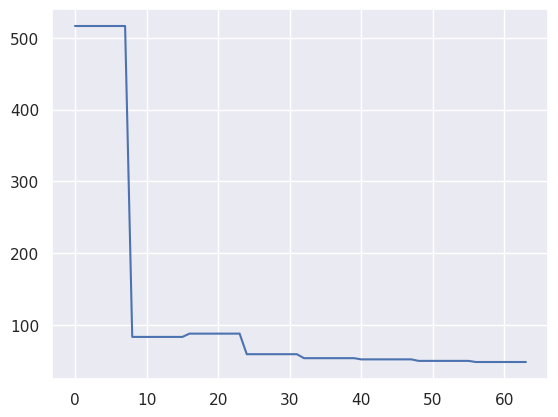

In [160]:
sampled_params_df.starting_bathymetry_mae.plot()

In [149]:
sampled_params_df.regional_rms.unique()

array([ 0.        ,  1.75576546,  3.51398998,  5.26975544,  7.0255209 ,
        8.78128636, 10.53951088, 12.29527634])

In [150]:
sampled_params_df.regional_strengths.unique()

array([ 0.  ,  7.14, 14.29, 21.43, 28.57, 35.71, 42.86, 50.  ])

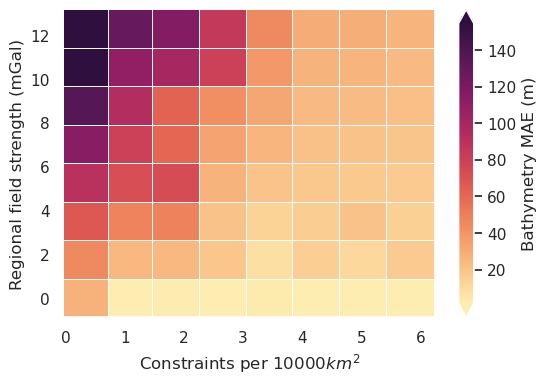

In [151]:
fig = RIS_plotting.plot_2var_ensemble(
    sampled_params_df,
    figsize=(6, 4),
    # x="constraint_spacing",
    # x_title="Constraint spacing (km)",
    # x="number_of_constraints",
    # x_title="Number of constraints",
    x="constraints_per_10000sq_km",
    x_title="Constraints per $10000 km^2$",
    y="regional_rms",
    y_title="Regional field strength (mGal)",
    background="inversion_mae",
    background_title="Bathymetry MAE (m)",
    # plot_title="Constraint spacing vs regional strength",
    background_robust=True,
    # logx=True,
)

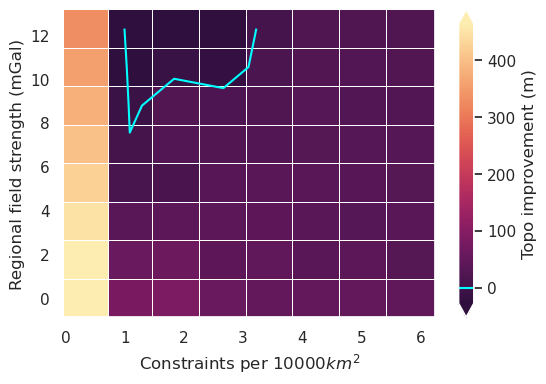

In [152]:
fig = RIS_plotting.plot_2var_ensemble(
    sampled_params_df,
    figsize=(6, 4),
    # x="constraint_spacing",
    # x_title="Constraint spacing (km)",
    # x="number_of_constraints",
    # x_title="Number of constraints",
    x="constraints_per_10000sq_km",
    x_title="Constraints per $10000 km^2$",
    y="regional_rms",
    y_title="Regional field strength (mGal)",
    background="topo_improvement_mae",
    background_title="Topo improvement (m)",
    background_cmap="cmo.matter_r",
    background_robust=True,
    # background_cpt_lims=(
    #     0,
    #     polar_utils.get_min_max(sampled_params_df.topo_improvement_mae, robust=True)[1],
    # ),
    plot_contours=[0],
    contour_color="cyan",
    # plot_title="Constraint spacing vs regional strength",
    # logx=True,
)

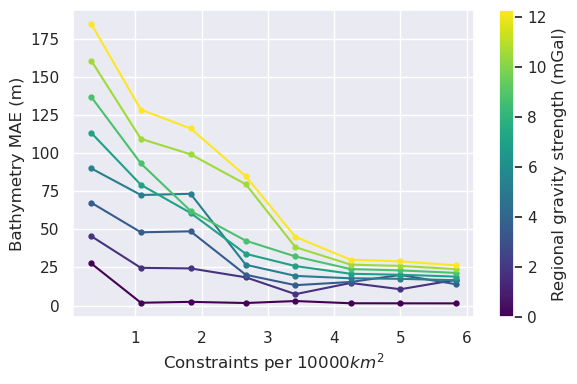

In [153]:
fig = RIS_plotting.plot_ensemble_as_lines(
    sampled_params_df,  # [sampled_params_df.constraint_numbers>2],
    figsize=(6, 4),
    # x="constraint_spacing",
    # x_label="Constraint spacing (km)",
    x="constraints_per_10000sq_km",
    x_label="Constraints per $10000 km^2$",
    # x="number_of_constraints",
    # x_label="Number of constraints",
    y="inversion_mae",
    y_label="Bathymetry MAE (m)",
    groupby_col="regional_rms",
    cbar_label="Regional gravity strength (mGal)",
    # trend_line=True,
    # horizontal_line=starting_bathymetry_rmse,
    # horizontal_line_label="Starting RMSE",
    # slope_min_max=True,
    # slope_mean=True,
)

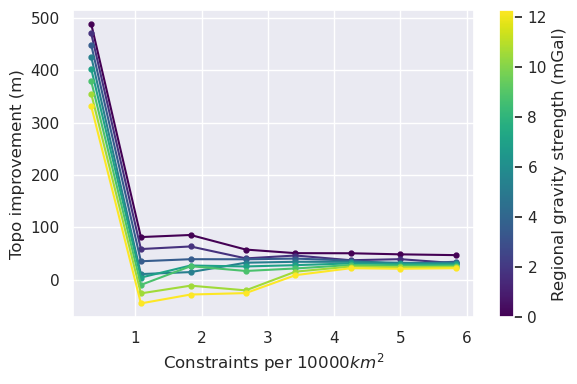

In [154]:
fig = RIS_plotting.plot_ensemble_as_lines(
    sampled_params_df,  # [sampled_params_df.constraint_numbers>2],
    figsize=(6, 4),
    # x="constraint_spacing",
    # x_label="Constraint spacing (km)",
    x="constraints_per_10000sq_km",
    x_label="Constraints per $10000 km^2$",
    y="topo_improvement_mae",
    y_label="Topo improvement (m)",
    groupby_col="regional_rms",
    cbar_label="Regional gravity strength (mGal)",
    # trend_line=True,
    # horizontal_line=0,
    # horizontal_line_label="Starting RMSE",
    # slope_min_max=True,
    # slope_mean=True,
    # logx=True,
)

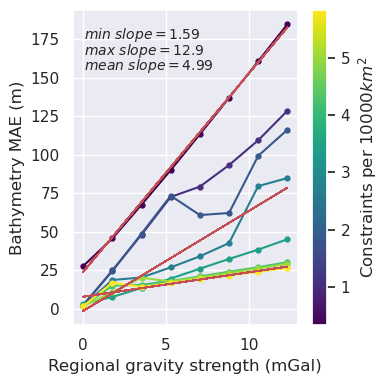

In [155]:
fig = RIS_plotting.plot_ensemble_as_lines(
    sampled_params_df,  # [sampled_params_df.constraint_numbers>2],
    figsize=(4, 4),
    x="regional_rms",
    x_label="Regional gravity strength (mGal)",
    y="inversion_mae",
    y_label="Bathymetry MAE (m)",
    # groupby_col="constraint_spacing",
    # cbar_label="Constraint spacing (km)",
    groupby_col="constraints_per_10000sq_km",
    cbar_label="Constraints per $10000 km^2$",
    trend_line=True,
    # horizontal_line=starting_bathymetry_rmse,
    # horizontal_line_label="Starting RMSE",
    slope_min_max=True,
    slope_mean=True,
)

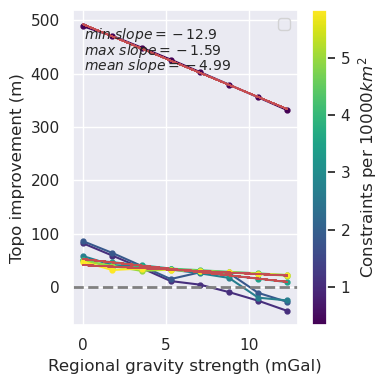

In [156]:
fig = RIS_plotting.plot_ensemble_as_lines(
    sampled_params_df,  # [sampled_params_df.constraint_numbers>2],
    figsize=(4, 4),
    x="regional_rms",
    x_label="Regional gravity strength (mGal)",
    y="topo_improvement_mae",
    y_label="Topo improvement (m)",
    # groupby_col="constraint_spacing",
    # cbar_label="Constraint spacing (km)",
    groupby_col="constraints_per_10000sq_km",
    cbar_label="Constraints per $10000 km^2$",
    trend_line=True,
    horizontal_line=0,
    # horizontal_line_label="Starting RMSE",
    slope_min_max=True,
    slope_mean=True,
)